---
<br>
<center><h1>Exploratory Analysis - Instacart</h1></center>
<center><h3>Ybigta Design team 11기 김도영</h3></center>
<br>

---

들어가기에 앞서, 필요한 모듈을 import합니다.

In [70]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
color = sns.color_palette()
%matplotlib inline
cf.go_offline()

데이터를 불러옵니다.

In [4]:
# 데이터 불러오기.

order_products_train_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<h2> 1. 데이터 살펴보기 - Univariate</h2>
<br>
데이터에 대한 전반적인 정보를 얻기 위해, 일단 각각의 데이터프레임과 그 안의 변수들을 **개별적으로** 살펴보려 합니다.

<h3>1-1. orders_df</h3>
<br>
개별 주문 안에 어떤 품목이 들어있는지까지는 아직 알 수 없지만, 일단 해당 사용자의 주문 횟수, 일시, 간격을 알 수 있습니다.

In [128]:
orders_df.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0

In [628]:
# 약 342만건의 주문 데이터가 있음을 확인.

print('전체 주문 데이터 수는 ', len(orders_df), '건 입니다.')

전체 주문 데이터 수는  3421083 건 입니다.


In [627]:
# 206209명의 사용자가 각각 train set과 test set으로 구분되었음을 확인.

print('전체 사용자는 ', len(orders_df['user_id'].unique()), '명 입니다.')
print('train set 사용자는 ', orders_df['eval_set'].value_counts()['train'], '명 입니다.')
print('test set 사용자는 ', orders_df['eval_set'].value_counts()['test'],'명 입니다.')

전체 사용자는  206209 명 입니다.
train set 사용자는  131209 명 입니다.
test set 사용자는  75000 명 입니다.


prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


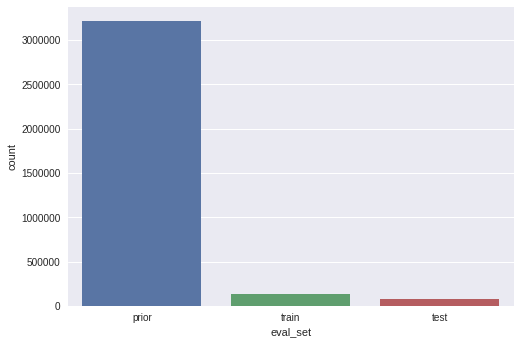

In [631]:
# 전체 주문 중 개별 사용자의 마지막 주문이 train 과 test로 구분되어 있음을 확인.

print(orders_df['eval_set'].value_counts())
sns.countplot(x="eval_set", data=orders_df)

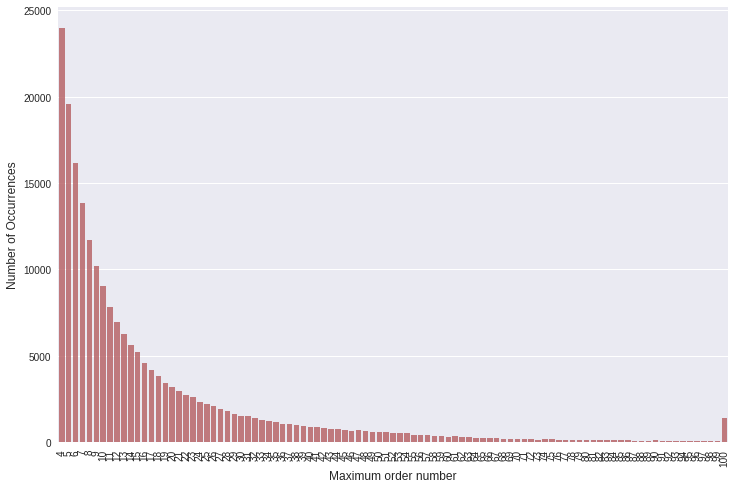

In [83]:
# 주문 횟수 히스토그램.
# 직관대로 주문횟수 10번 이하의 라이트 유저가 많은 것을 확인.
# 100회에서 갑자기 회원 수가 증가하는 것은 100회 이상 주문한 회원의 데이터도 100회로 제한하여 제공했기 때문으로 추측.

user_ordernum = pd.DataFrame()
tmp1 = orders_df['user_id'].value_counts()
user_ordernum['ordernum'] = tmp1

ordernum_count = user_ordernum.ordernum.value_counts()
sns.set()
plt.figure(figsize=(12,8))
sns.barplot(ordernum_count.index, ordernum_count.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

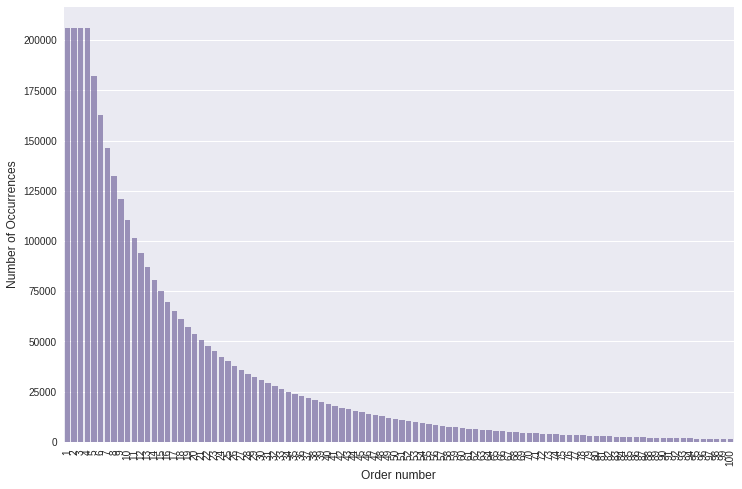

In [85]:
# 주문 순서는 user_id에서 얻는 것보다 얕은 정보를 제공.

order_number = orders_df['order_number'].value_counts()

sns.set()
plt.figure(figsize=(12,8))
sns.barplot(order_number.index, order_number.values, alpha=0.8, color=color[3])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

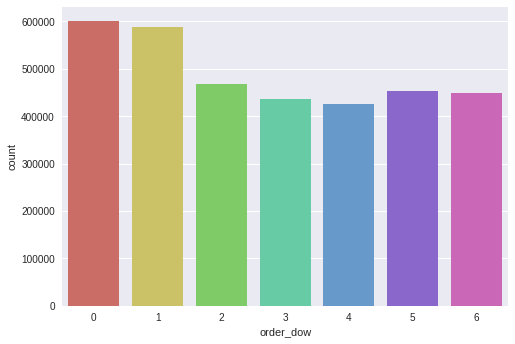

In [90]:
# 주문한 요일에 대한 정보.
# 0일과 1일이 각각 토요일, 일요일인 것으로 추정, 주말에 주문량이 많은 것을 확인.

sns.countplot(x="order_dow", data=orders_df,  palette = 'hls')

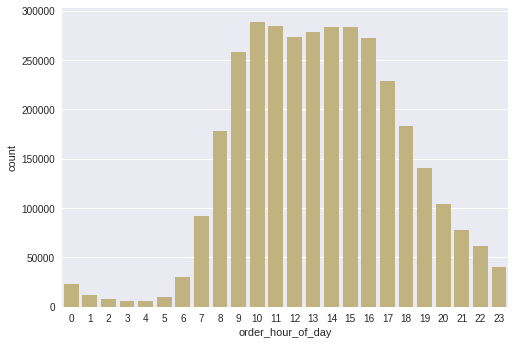

In [92]:
# 주문 시간.
# 보통 9시 ~ 17시의 오전,오후 시간에 몰려있는 것을 확인.
sns.countplot(x="order_hour_of_day", data=orders_df,  color=color[4])

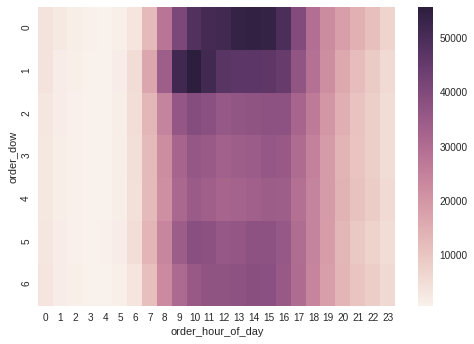

In [99]:
# 토요일 오후, 일요일 오전에 주문량이 몰리는 것으로 추정됨.

order_day_time = orders_df.groupby(['order_dow','order_hour_of_day']).count().order_id.unstack()
sns.heatmap(data= order_day_time)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

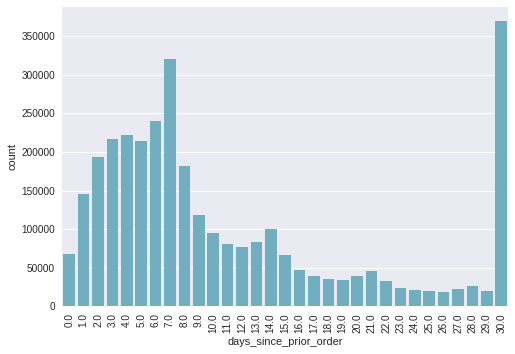

In [101]:
# 이전 주문과의 시간차.
# 7일 간격으로 주문하는 사람이 많다는 것을 확인, 7의 배수인 14,21,28에서도 미세하게 값이 높은 것을 확인.
# 왜 30일에서의 값이 저렇게 높을까? 30일 이상 주문이 없을 경우 모두 30일로 처리했을 것으로 짐작해본다.
# None값은 첫 주문이라는 뜻이므로 무시한다.

sns.countplot(x="days_since_prior_order", data=orders_df,  color=color[5])
plt.xticks(rotation='vertical')

<h4>Variables (To sum up...)</h4>
<br>
 - order_id	: 말 그대로 주문번호입니다. 3421083건의 데이터에 대한 index로 이해했습니다.
 - user_id	: 206209명의 비식별화된 사용자가 있습니다. 각 사용자의 출현빈도를 히스토그램으로 살펴본 결과, 개별 사용자가 최소 4번에서 최대 100번까지 주문한 사실을 확인했습니다. 데이터를 제공한 인스타카트 측에서 4번 미만으로 주문한 사용자의 기록을 임의로 배제하고 100번 이상 주문한 사용자들을 모두 '100회' 주문으로 묶은 사실을 알 수 있습니다.
 - eval_set	: 개별 사용자의 마지막 주문을 제외한 모든 주문은 prior 입니다. 마지막 주문은 train과 test로 나뉘어져 있고, 우리의 목적은 test에 해당하는 주문에 어떤 품목이 들어있을지 예측하는 것입니다.
 - order_number	: 주문 순서로, used_id와 비슷한 직관을 얻을 수 있어 넘어가겠습니다.
 - order_dow : 	주문 요일입니다. 주로 주말에 주문량이 많은 것을 확인했습니다.
 - order_hour_of_day : 주문 시간대입니다. 주로 9~17시 사이에 주문량이 많은 것을 확인했습니다. 
 - days_since_prior_order : 이전 주문과의 시간차입니다. 1주일 싸이클인 7일 간격으로 주문하는 경우가 가장 많은 것을 확인했습니다.


<br>
<br>
<br>
<br>
<br>
<h3>1-2. order_products_train_df, order_products_prior_df</h3>
<br>
개별 주문 안에 어떤 품목이 들어있는지 확인할 수 있습니다. 그리고 개별 품목의 재주문 여부, 카트에 담긴 순서를 확인할 수 있습니다.

In [30]:
order_products_train_df.head()

order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1

In [32]:
order_products_prior_df.head()

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

In [634]:
# train, 즉 마지막 주문의 일부만 해도 벌써 138만개 품목의 주문 데이터가 나옵니다.

print('order_products_train_df 에는', len(order_products_train_df),'개 의 개별 품목 주문 데이터가 있습니다.')

order_products_train_df 에는 1384617 개 의 개별 품목 주문 데이터가 있습니다.


In [635]:
# prior, 즉 마지막 주문을 제외한 모든 주문에는 3200만개 이상의 품목 주문 데이터가 있습니다.

print('order_products_prior_df 에는', len(order_products_prior_df),'개 의 개별 품목 주문 데이터가 있습니다.')

order_products_prior_df 에는 32434489 개 의 개별 품목 주문 데이터가 있습니다.


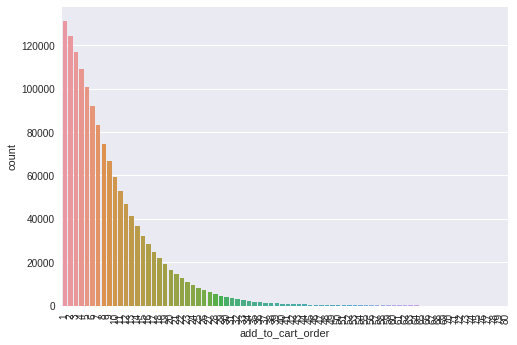

In [667]:
# 장바구니에 담기는 순서의 빈도는 당연히 그 순서가 뒤로 갈 수록 줄어듭니다.

sns.countplot(x="add_to_cart_order", data=order_products_train_df)
plt.xticks(rotation='vertical')
plt.show()

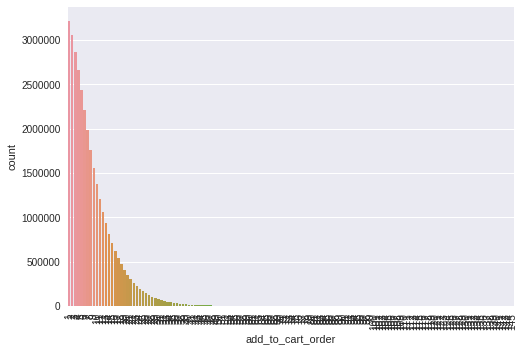

In [668]:
# 장바구니에 담기는 순서의 빈도는 당연히 그 순서가 뒤로 갈 수록 줄어듭니다.

sns.countplot(x="add_to_cart_order", data=order_products_prior_df)
plt.xticks(rotation='vertical')
plt.show()

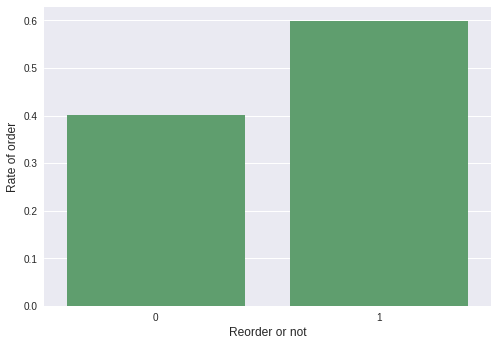

In [126]:
# 재구매하는 품목의 비율은 약 60%.

reorder_df = pd.DataFrame()
reorder_df['sum'] = order_products_train_df['reordered'].value_counts()
reorder_df['rate'] = [i/(reorder_df['sum'].sum()) for i in reorder_df['sum']]
sns.set()
reorder_rate = reorder_df['rate']
sns.barplot(reorder_rate.index, reorder_rate.values, color=color[1])
plt.ylabel('Rate of order', fontsize=12)
plt.xlabel('Reorder or not', fontsize=12)
plt.show()

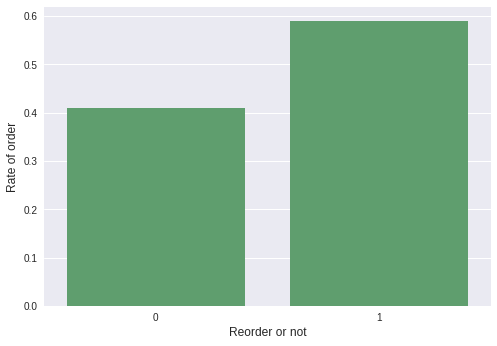

In [127]:
# prior 데이터에서도 역시 재구매 품목의 비율을 60% 정도.

reorder_df = pd.DataFrame()
reorder_df['sum'] = order_products_prior_df['reordered'].value_counts()
reorder_df['rate'] = [i/(reorder_df['sum'].sum()) for i in reorder_df['sum']]
reorder_rate = reorder_df['rate']
sns.barplot(reorder_rate.index, reorder_rate.values, color=color[1])
plt.ylabel('Rate of order', fontsize=12)
plt.xlabel('Reorder or not', fontsize=12)
plt.show()

<h4>Variables (To sum up...)</h4>
<br>
- order_id : 주문번호입니다. 위에서 살펴본 orders_df의 id와 일치하기 때문에 데이터를 병합할 때 key로 사용할 예정입니다.
- product_id : 개별 품목의 id입니다. 
- add_to_cart_order	: 장바구니에 담긴 순서입니다. 이것 자체로는 아직 알 수 있는 정보가 없습니다. 
- reordered : 재주문 여부입니다. 전체 주문 품목의 약 60%가 재주문한 품목임을 확인했습니다.


<br>
<br>
<br>
<br>
<br>
<h3>1-3. products_df, aisles_df, departments_df</h3>
<br>
제품에 대한 정보를 제공하는 데이터입니다

In [50]:
products_df.head()

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [636]:
# 개별 품목의 개수는 약 5만개입니다.

print('개별 품목 개수는 총', len(products_df), '개 입니다.')

개별 품목 개수는 총 49688 개 입니다.


In [51]:
aisles_df.head()

aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

In [637]:
# 134개의 품목 중분류가 있습니다.

print('품목 중분류 개수는 총', len(aisles_df), '개 입니다.')

품목 중분류 개수는 총 134 개 입니다.


In [56]:
departments_df

department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing

In [638]:
# 21개의 품목 대분류가 있습니다.

print('품목 대분류 개수는 총', len(departments_df), '개 입니다.')

품목 대분류 개수는 총 21 개 입니다.


여기까지 주어진 데이터와 변수를 하나씩 단순하게 살펴보았고, 

이제 동일한 key 값을 기준으로 묶은 데이터를 만들어 관련성 높은 데이터 간 상관관계를 그래프를 통해 살펴보겠습니다.

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<br>
<h2> 2. 데이터 살펴보기 - Multivariate</h2>
<br>

먼저 앞에서 살펴본 데이터를 같은 key를 기준으로 하여 묶어줍니다. 

이 과정을 통해 비로소 해당 주문에 어떤 물건들이 포함되어 있었는지 알 수 있게 됩니다.

In [9]:
# 주문 데이터를 eval_set을 기준으로 나눠줍니다.

orders_prior_df = orders_df[lambda x: x.eval_set == 'prior']
orders_train_df = orders_df[lambda x: x.eval_set == 'train']
orders_test_df = orders_df[lambda x: x.eval_set == 'test']

In [ ]:
# prior 데이터를 각 key값에 맞게 merging.

orders_prior_df = orders_prior_df.merge(order_products_prior_df, how='outer', left_on='order_id', right_on='order_id')
orders_prior_df = orders_prior_df.merge(products_df, how='outer', left_on='product_id', right_on='product_id')
orders_prior_df = orders_prior_df.merge(aisles_df, how='outer', left_on='aisle_id', right_on='aisle_id')
orders_prior_df = orders_prior_df.merge(departments_df, how='outer', left_on='department_id', right_on='department_id')

In [27]:
# 결과물.

orders_prior_df.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0  2539329.0      1.0    prior           1.0        2.0                8.0   
1  2398795.0      1.0    prior           2.0        3.0                7.0   
2   473747.0      1.0    prior           3.0        3.0               12.0   
3  2254736.0      1.0    prior           4.0        4.0                7.0   
4   431534.0      1.0    prior           5.0        4.0               15.0   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                1.0        0.0   
1                    15.0         196                1.0        1.0   
2                    21.0         196                1.0        1.0   
3                    29.0         196                1.0        1.0   
4                    28.0         196                1.0        1.0   

  product_name  aisle_id  department_id        aisle department  
0         Soda        77              7  soft drinks  beverages  
1         Soda        77              7  soft drinks  beverages  
2         Soda        77              7  soft drinks  beverages  
3         Soda        77              7  soft drinks  beverages  
4         Soda        77              7  soft drinks  beverages

In [243]:
# 결측치 확인 결과 11개의 결측치가 생겼습니다. 아마도 prior 데이터 전체에서 한 번도 구매되지 않은 품목이 11개인듯 합니다.
# days_since_prior_order는 앞에서도 말했듯이 첫 주문이 모두 결측치로 처리되므로 무시합니다.

orders_prior_df.isnull().sum()

order_id                       11
user_id                        11
eval_set                       11
order_number                   11
order_dow                      11
order_hour_of_day              11
days_since_prior_order    2078079
product_id                      0
add_to_cart_order              11
reordered                      11
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
dtype: int64

In [245]:
# 이런 결측치는 바로 지워줍니다.

orders_prior_df = orders_prior_df.dropna(thresh=8)

In [246]:
# 부적절한 결측치가 없는 것을 확인.

orders_prior_df.isnull().sum()

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
dtype: int64

In [ ]:
# 다음으로 train 데이터를 각 key값에 맞게 merging.

orders_train_df = orders_train_df.merge(order_products_train_df, how='outer', left_on='order_id', right_on='order_id')
orders_train_df = orders_train_df.merge(products_df, how='outer', left_on='product_id', right_on='product_id')
orders_train_df = orders_train_df.merge(aisles_df, how='outer', left_on='aisle_id', right_on='aisle_id')
orders_train_df = orders_train_df.merge(departments_df, how='outer', left_on='department_id', right_on='department_id')

In [241]:
# 마지막 주문에 포함되지 못한 물품들 때문에 결측치가 포함된 row가 생기므로 결측치를 지워줍니다.

orders_train_df = orders_train_df.dropna()

In [242]:
# 모든 결측치를 제거했습니다.

orders_train_df.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
dtype: int64

In [247]:
# 결과물.

orders_train_df.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0  1187899.0      1.0    train          11.0        4.0                8.0   
1  2757217.0     67.0    train          25.0        0.0               11.0   
2   632715.0    676.0    train          12.0        0.0               13.0   
3  1167274.0    760.0    train           5.0        4.0               10.0   
4  3347074.0    804.0    train          16.0        3.0               21.0   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                    14.0         196                1.0        1.0   
1                     5.0         196                1.0        1.0   
2                    26.0         196                2.0        1.0   
3                     8.0         196                2.0        1.0   
4                     5.0         196                4.0        0.0   

  product_name  aisle_id  department_id        aisle department  
0         Soda        77              7  soft drinks  beverages  
1         Soda        77              7  soft drinks  beverages  
2         Soda        77              7  soft drinks  beverages  
3         Soda        77              7  soft drinks  beverages  
4         Soda        77              7  soft drinks  beverages

In [33]:
# test set은 따로 분리.

orders_test_df.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
38    2774568        3     test            13          5                 15   
44     329954        4     test             6          3                 12   
53    1528013        6     test             4          3                 16   
96    1376945       11     test             8          6                 11   
102   1356845       12     test             6          1                 20   

     days_since_prior_order  
38                     11.0  
44                     30.0  
53                     22.0  
96                      8.0  
102                    30.0

In [248]:
# 결측치가 없느 것을 확인.

orders_test_df.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

<br>
<br>
<br>
<br>
<br>
<br>
기준에 따라 merge된 데이터프레임들을 다시 하나로 합치고,

각각 train set과 test set에 속한 사용자끼리 데이터를 나눠줍니다.

이 과정을 통해 한 덩어리로 묶여있던 prior 데이터도 기준에 따라 나뉘게 됩니다.
<br>
<br>
<br>

In [249]:
# 위에서 merge 한 세 데이터프레임을 합쳐줍니다.

orders_total_df = pd.concat([orders_prior_df,orders_train_df,orders_test_df])

In [639]:
# 합친 후 다시 한 번 결측치 확인.

orders_total_df.isnull().sum()

add_to_cart_order           75000
aisle                       75000
aisle_id                    75000
days_since_prior_order    2078068
department                  75000
department_id               75000
eval_set                        0
order_dow                       0
order_hour_of_day               0
order_id                        0
order_number                    0
product_id                  75000
product_name                75000
reordered                   75000
user_id                         0
train_or_not                    0
dtype: int64

In [565]:
# train set에 속하는 유저 id

train_user = pd.DataFrame(orders_total_df[lambda x: x.eval_set == 'train'].user_id.unique())
train_user.columns = ['user_id']
train_user['train_or_not'] = 1

train_user.head()

user_id  train_or_not
0      1.0             1
1     67.0             1
2    676.0             1
3    760.0             1
4    804.0             1

In [567]:
# test set에 속하는 유저 id

test_user = pd.DataFrame(orders_total_df[lambda x: x.eval_set == 'test'].user_id.unique())
test_user.columns = ['user_id']
test_user['train_or_not'] = 0

test_user.head()

user_id  train_or_not
0      3.0             0
1      4.0             0
2      6.0             0
3     11.0             0
4     12.0             0

In [571]:
# 두 데이터프레임을 합친 후, id를 기준으로 기존 데이터프레임에 merge합니다.

user_class_df = pd.concat([train_user,test_user])
user_class_df.train_or_not.value_counts()

orders_total_df = pd.merge(orders_total_df, user_class_df, how='outer', on='user_id')

1    131209
0     75000
Name: train_or_not, dtype: int64

In [576]:
# 이로써 prior 데이터까지 포함한 test set과 train set이 만들어졌습니다.

total_train_df = orders_total_df[lambda x: x.train_or_not == 1]
total_test_df = orders_total_df[lambda x: x.train_or_not == 0]

<br>
<br>
<br>
<br>
<br>
<h3>2-1. orders_total_df</h3>
<br>
일단 train, test로 나뉘지 않은 모든 prior 데이터를 사용하여 타겟 변수인 재구매와 다른 변수들 간의 관계를 살펴보겠습니다.

In [66]:
# 일단 디스플레이 옵션을 조정합니다.

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [252]:
orders_total_df.head()

add_to_cart_order        aisle  aisle_id  days_since_prior_order  \
0                1.0  soft drinks      77.0                     NaN   
1                1.0  soft drinks      77.0                    15.0   
2                1.0  soft drinks      77.0                    21.0   
3                1.0  soft drinks      77.0                    29.0   
4                1.0  soft drinks      77.0                    28.0   

  department  department_id eval_set  order_dow  order_hour_of_day   order_id  \
0  beverages            7.0    prior        2.0                8.0  2539329.0   
1  beverages            7.0    prior        3.0                7.0  2398795.0   
2  beverages            7.0    prior        3.0               12.0   473747.0   
3  beverages            7.0    prior        4.0                7.0  2254736.0   
4  beverages            7.0    prior        4.0               15.0   431534.0   

   order_number  product_id product_name  reordered  user_id  
0           1.0       196.0         Soda        0.0      1.0  
1           2.0       196.0         Soda        1.0      1.0  
2           3.0       196.0         Soda        1.0      1.0  
3           4.0       196.0         Soda        1.0      1.0  
4           5.0       196.0         Soda        1.0      1.0

In [253]:
orders_total_df.columns

Index(['add_to_cart_order', 'aisle', 'aisle_id', 'days_since_prior_order',
       'department', 'department_id', 'eval_set', 'order_dow',
       'order_hour_of_day', 'order_id', 'order_number', 'product_id',
       'product_name', 'reordered', 'user_id'],
      dtype='object')

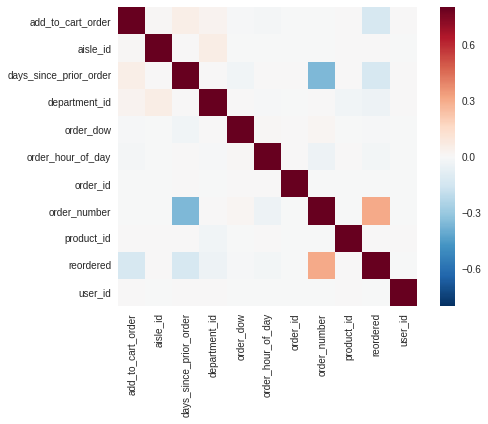

In [259]:
# 다른 것에 앞서, 먼저 변수 간 Correlation을 살펴봅니다.
# 일단 수치상으로 눈에 띄는 두 지점만 살펴보겠습니다.
# 1. 이미 많은 주문을 한 유저는 재주문하는 품목이 많을 것입니다.
# 2. 이미 많은 주문을 한 유저는 다음 주문도 상대적으로 가까운 시기에 하는 경향이 있어보입니다.
#   (아무래도 주문량이 많은 유저는 주문을 자주 하기도 할 것입니다.)

orders_corr = orders_total_df.corr()
sns.heatmap(orders_corr, vmax=.8, square=True)

In [646]:
# 카트에 담기는 순서와 재구매율의 관계.

cart_reorder_df = orders_total_df.groupby(['add_to_cart_order','reordered']).size().unstack()
cart_reorder_df['reorder_rate'] = cart_reorder_df[1.0]/(cart_reorder_df[1.0]+cart_reorder_df[0.0])
cart_reorder_df.head()

reordered                0.0        1.0  reorder_rate
add_to_cart_order                                    
1.0                1073083.0  2273000.0      0.679302
2.0                1027514.0  2154976.0      0.677135
3.0                1020668.0  1967461.0      0.658426
4.0                1005654.0  1767415.0      0.637350
5.0                 972361.0  1570409.0      0.617598

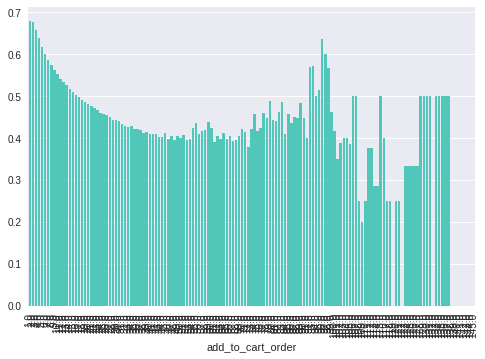

In [651]:
# cart에 담기는 순서가 밀릴수록 재구매율은 하락하는 것을 확인.
# add_to_cart_order가 증가할수록 표본의 갯수가 작아져 일정하지 않은 결과값이 나옴.

sns.barplot(cart_reorder_df['reorder_rate'].index, cart_reorder_df['reorder_rate'].values, color= '#3ddbc8')
plt.xticks(rotation='vertical')
plt.show()

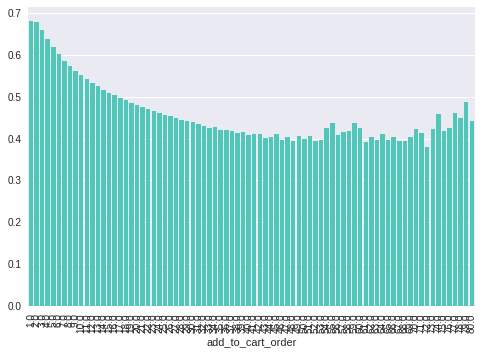

In [663]:
# 표본 갯수가 일정 수준 이상인 데이터만 사용하여 다시 그림.

sns.barplot(cart_reorder_df.iloc[list(range(80)),:]['reorder_rate'].index, cart_reorder_df.iloc[list(range(80)),:]['reorder_rate'].values, color= '#3ddbc8')
plt.xticks(rotation='vertical')
plt.show()

In [671]:
# 각 주문간 간격과 재구매율의 관계.

interval_reorder_df = orders_total_df.groupby(['days_since_prior_order','reordered']).size().unstack()
interval_reorder_df['reorder_rate'] = interval_reorder_df[1.0]/(interval_reorder_df[1.0]+interval_reorder_df[0.0])
interval_reorder_df.index = range(31)
interval_reorder_df.head()

reordered     0.0      1.0  reorder_rate
0          120215   345527      0.741885
1          367272   593109      0.617577
2          529848   962531      0.644964
3          634984  1279447      0.668317
4          685690  1440597      0.677518

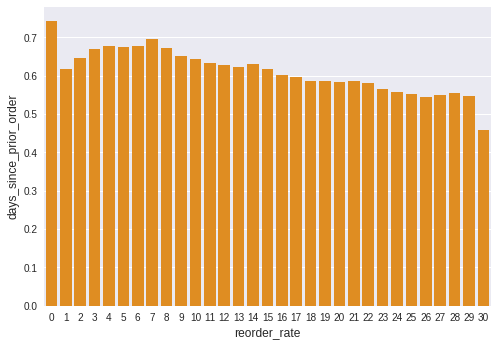

In [673]:
# 이전 주문과의 격차가 클 수록 재구매율도 감소하는 추세를 확인.

sns.barplot(interval_reorder_df['reorder_rate'].index, interval_reorder_df['reorder_rate'].values, color= '#ff9102')
plt.ylabel('days_since_prior_order', fontsize=12)
plt.xlabel('reorder_rate', fontsize=12)
plt.show()

In [675]:
# 구매한 요일과 재구매율의 상관관계.

dow_reorder_df = orders_total_df.groupby(['order_dow','reordered']).size().unstack()
dow_reorder_df['reorder_rate'] = dow_reorder_df[1.0]/(dow_reorder_df[1.0]+dow_reorder_df[0.0])
dow_reorder_df

reordered      0.0      1.0  reorder_rate
order_dow                                
0.0        2701792  3831900      0.586483
1.0        2327173  3544661      0.603672
2.0        1796354  2582006      0.589720
3.0        1654221  2344277      0.586289
4.0        1612076  2330620      0.591123
5.0        1772555  2613888      0.595902
6.0        1999575  2708008      0.575244

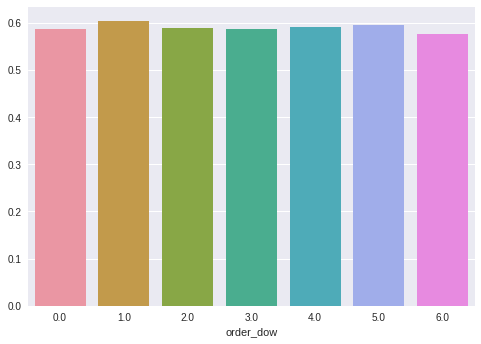

In [677]:
# 구매요일과 재구매율은 큰 관련이 없어보임.

sns.barplot(dow_reorder_df['reorder_rate'].index, dow_reorder_df['reorder_rate'].values )

In [680]:
# 주문 시간대와 재구매율의 상관관계.

hour_reorder_df = orders_total_df.groupby(['order_hour_of_day','reordered']).size().unstack()
hour_reorder_df['reorder_rate'] = hour_reorder_df[1.0]/(hour_reorder_df[1.0]+hour_reorder_df[0.0])
hour_reorder_df.head()

reordered            0.0     1.0  reorder_rate
order_hour_of_day                             
0.0                99028  129003      0.565726
1.0                53646   67766      0.558149
2.0                32292   40368      0.555574
3.0                23627   30132      0.560501
4.0                23825   31889      0.572370

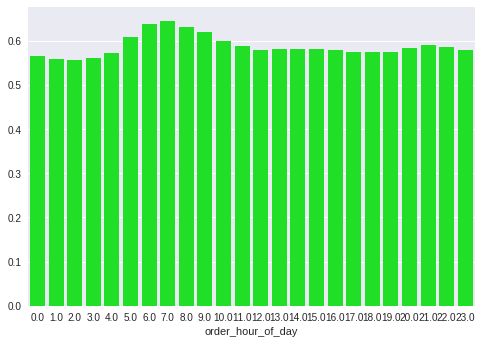

In [681]:
# 오전 시간 구매자의 재구매율이 약간 더 높은 것을 확인.

sns.barplot(hour_reorder_df['reorder_rate'].index, hour_reorder_df['reorder_rate'].values, color='#01ff0a' )

In [687]:
# 주문 번호와 재구매율의 상관관계.

ordernum_reorder_df = orders_total_df.groupby(['order_number','reordered']).size().unstack()
ordernum_reorder_df['reorder_rate'] = ordernum_reorder_df[1.0]/(ordernum_reorder_df[1.0]+ordernum_reorder_df[0.0])
ordernum_reorder_df.index = range(1,101)
ordernum_reorder_df.head()

reordered        0.0       1.0  reorder_rate
1          2078068.0       NaN           NaN
2          1490447.0  557885.0      0.272361
3          1258570.0  792161.0      0.386282
4          1075600.0  894580.0      0.454060
5           870202.0  881757.0      0.503298

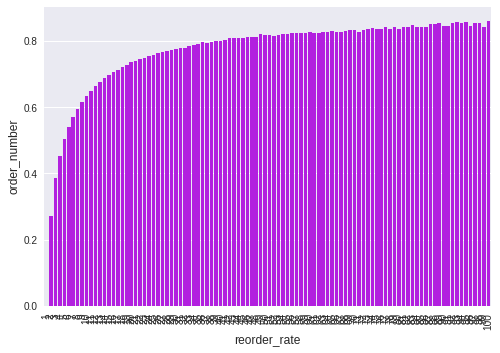

In [688]:
# 주문 횟수가 증가함에 따라 재구매율도 급격히 상승하는 것을 확인.
# 주문 횟수 10회 이상부터는 재구매율 60% 이상
# 최소 주문 횟수인 4회에서도 재구매율은 50%정도

sns.barplot(ordernum_reorder_df['reorder_rate'].index, ordernum_reorder_df['reorder_rate'].values, color='#c300ff' )
plt.ylabel('order_number', fontsize=12)
plt.xlabel('reorder_rate', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [689]:
orders_total_df.columns

Index(['add_to_cart_order', 'aisle', 'aisle_id', 'days_since_prior_order',
       'department', 'department_id', 'eval_set', 'order_dow',
       'order_hour_of_day', 'order_id', 'order_number', 'product_id',
       'product_name', 'reordered', 'user_id', 'train_or_not'],
      dtype='object')

In [692]:
prod_reorder_df = orders_total_df[['aisle','aisle_id','department','department_id','product_name','product_id','reordered']]

In [694]:


product_reorder_df = prod_reorder_df.groupby(['product_id','reordered']).size().unstack()
product_reorder_df['reorder_rate'] = product_reorder_df[1.0]/(product_reorder_df[1.0]+product_reorder_df[0.0])
product_reorder_df.head()

reordered     0.0     1.0  reorder_rate
product_id                             
1.0         743.0  1185.0      0.614627
2.0          81.0    13.0      0.138298
3.0          74.0   209.0      0.738516
4.0         190.0   161.0      0.458689
5.0           6.0    10.0      0.625000

In [698]:

product_reorder_df = product_reorder_df.reset_index()

prod_reorder_df = pd.merge(prod_reorder_df, product_reorder_df, how='outer', on='product_id')
del prod_reorder_df[0.0]
del prod_reorder_df[1.0]
prod_reorder_df.head()

aisle  aisle_id department  department_id product_name  product_id  \
0  soft drinks      77.0  beverages            7.0         Soda       196.0   
1  soft drinks      77.0  beverages            7.0         Soda       196.0   
2  soft drinks      77.0  beverages            7.0         Soda       196.0   
3  soft drinks      77.0  beverages            7.0         Soda       196.0   
4  soft drinks      77.0  beverages            7.0         Soda       196.0   

   reordered  reorder_rate  
0        0.0      0.777843  
1        1.0      0.777843  
2        1.0      0.777843  
3        1.0      0.777843  
4        1.0      0.777843

In [748]:
prod_reorder_df['organic_or_not'] = prod_reorder_df['product_name'].map(lambda x: 1 if ('Organic' in str(x)) else 0)
dd_prod_reorder_df['organic_or_not'].value_counts()

0    44651
1     5035
Name: organic_or_not, dtype: int64

In [744]:
dd_prod_reorder_df = prod_reorder_df.drop_duplicates(subset='product_name')
dd_prod_reorder_df.head()

aisle  aisle_id  department  department_id  \
0           soft drinks      77.0   beverages            7.0   
37298       soft drinks      77.0   beverages            7.0   
46203   soy lactosefree      91.0  dairy eggs           16.0   
62682   soy lactosefree      91.0  dairy eggs           16.0   
122753  packaged cheese      21.0  dairy eggs           16.0   

                                   product_name  product_id  reordered  \
0                                          Soda       196.0        0.0   
37298                         Zero Calorie Cola     46149.0        0.0   
46203   Organic Unsweetened Vanilla Almond Milk     14084.0        0.0   
62682           Organic Unsweetened Almond Milk     35951.0        0.0   
122753                    Organic String Cheese     25133.0        0.0   

        reorder_rate  organic_or_not  
0           0.777843               0  
37298       0.812802               0  
46203       0.811336               1  
62682       0.758403               1  
122753      0.740364               1

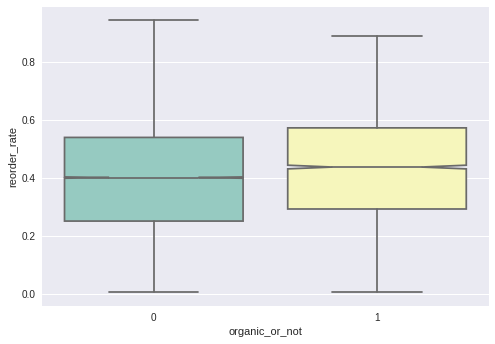

In [753]:
# 유기농 제품들의 재구매율이 미세하게 높음.
# 그룸 내 편차가 어느 정도 있는 편.

sns.boxplot( x = 'organic_or_not', y = 'reorder_rate', data = dd_prod_reorder_df, palette = 'Set3', notch = True )

In [761]:

organic_reorder_df = prod_reorder_df.groupby(['organic_or_not','reordered']).size().unstack()
organic_reorder_df['reorder_rate'] = organic_reorder_df[1.0]/(organic_reorder_df[1.0]+organic_reorder_df[0.0])
organic_reorder_df.head()

reordered           0.0       1.0  reorder_rate
organic_or_not                                 
0               9978458  13184660      0.569209
1               3885288   6770700      0.635389

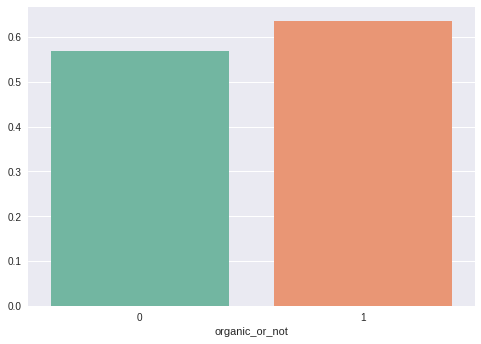

In [764]:
# 유기농 제품들의 재구매율이 미세하게 높음.
# 품목별 재구매율이 아닌 전체 재구매 여부로 봐도 높은 것을 확인.

sns.barplot(organic_reorder_df['reorder_rate'].index, organic_reorder_df['reorder_rate'].values, palette = 'Set2')

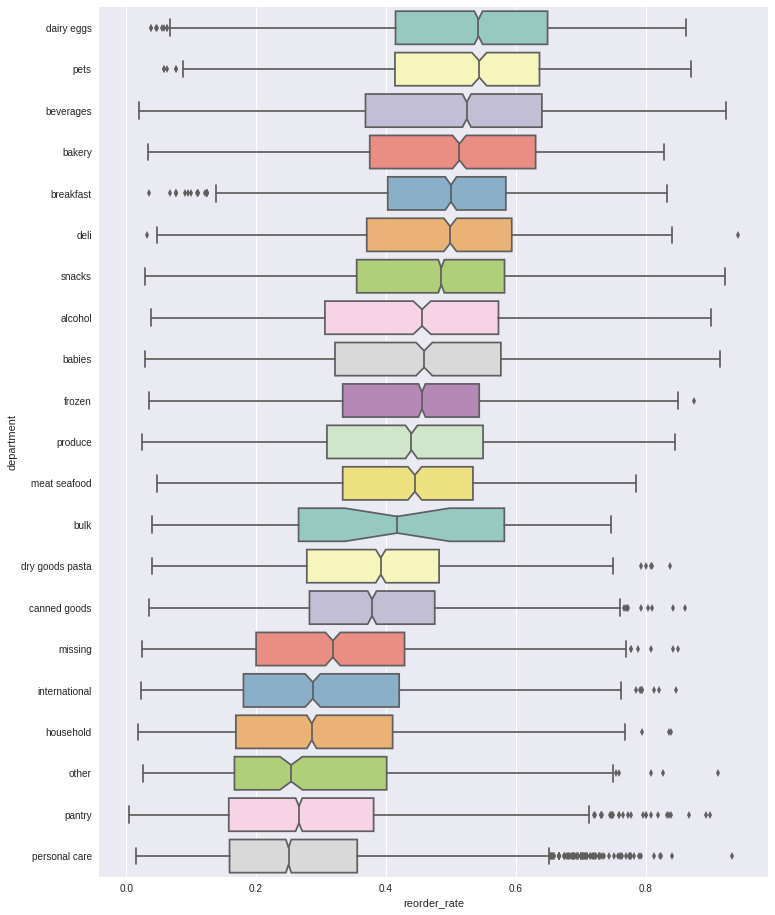

In [749]:
# 재구매율과 대분류는 어느 정도 관련성이 있어보임.
# 모든 그룹에서 min과 max의 격차가 매우 큼. 

dep_rank = dd_prod_reorder_df.groupby(['department'])['reorder_rate'].mean().sort_values(ascending = False)
dep_rank_list = list(dep_rank.index)

plt.figure(figsize=(12,16))
sns.boxplot(x = 'reorder_rate', y = 'department', data = dd_prod_reorder_df, order = dep_rank_list, palette = 'Set3', notch = True )
plt.show()

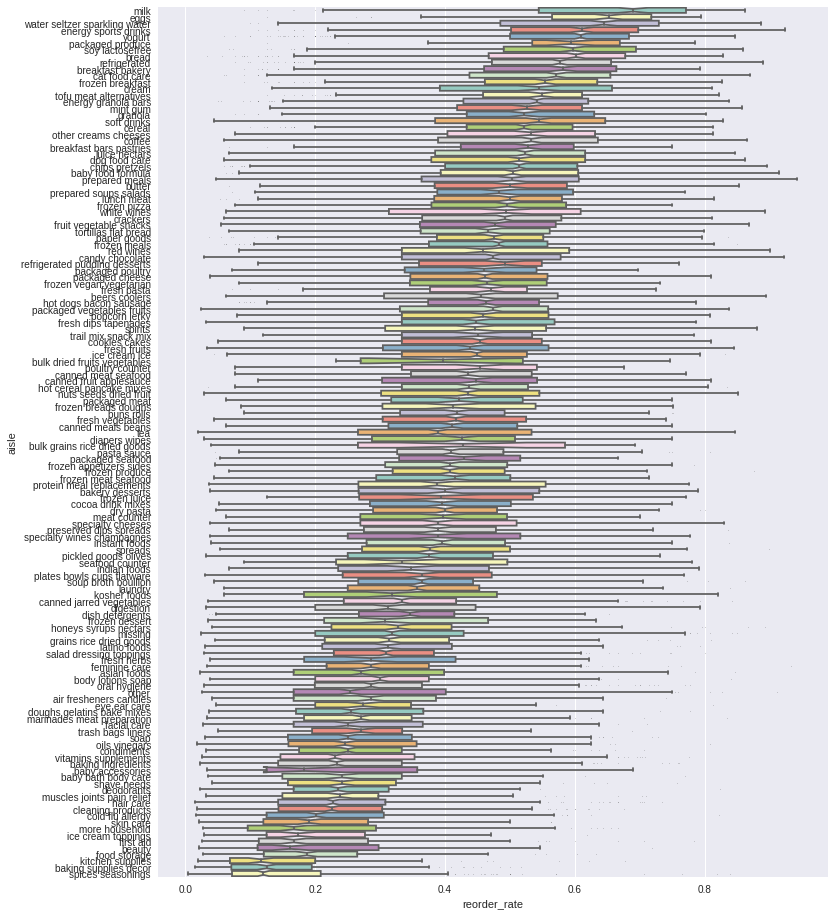

In [752]:
# 대분류에 비해 집단 내 재구매율 편차가 큰 집단들이 많이 보임.
# 재구매율 차이는 집단마다 어느 정도 일정하고, 역시 min과 max의 차이가 아주 큼.

aisle_rank = dd_prod_reorder_df.groupby(['aisle'])['reorder_rate'].mean().sort_values(ascending = False)
aisle_rank_list = list(aisle_rank.index)

plt.figure(figsize=(12,16))
sns.boxplot(x = 'reorder_rate', y = 'aisle', data = dd_prod_reorder_df, order = aisle_rank_list, palette = 'Set3', fliersize=0.5, notch = True )
plt.show()

<br>
<br>
<br>
<br>
<br>
<h3>2-2. 파생변수 생성</h3>
<br>


결과적으로 우린 해당 사용자의 **이전 구매 품목 재구매 여부** 를 알아내야 합니다.<br>


따라서, <br>
**모든 이전 구매 품목에 대한 과거 자료를 한 줄의 행에 압축하여 표현하고,**<br>
**그 정보를 바탕으로 재구매 여부를 classifier가 판별해주도록 만들어야 합니다.**

그렇다면 누적된 구매기록들을 어떻게 압축하는가, 즉 어떤 파생변수를 사용하는지가 예측결과에 직접적인 영향을 미칠 것으로 예상됩니다.

<br>
<br>

일단 통합된 데이터를 관찰해보니 직관적으로 생성 가능한 파생변수가 몇 있습니다.

<br>
<br>

1. 얼마나 많이 재구매했는가? (절대적 재구매횟수) 
> - 상식적으로 많이 재구매한 물건은 다시 구매할 확률도 높을 것입니다.
2. 얼마나 많이 주문했는가? (절대적 주문횟수) 
> - user의 주문횟수가 4회에서 100회로 그 편차가 큽니다. 주문횟수에 따라 user의 행동이 어떻게 달라지는지 관찰할 필요가 있어 보입니다. 
3. 전체 주문 횟수에 비해 얼마나 많이 구매했는가? (상대적 재구매횟수) 
> - 총 주문 횟수가 10회인 사용자가 9번 주문한 물건은 총 주문횟수가 100회인 사용자가 9번 주문한 물건에 비해 재주문 확률이 훨씬 높을 것입니다. 
4. 카트에 보통 몇번째로 담기는 물건인가? (카트에 담기는 순서의 평균, 표준편차, 최근 순서) 
> - 직관적으로 생각해볼 때, 자주 사는 (재구매하는) 물건을 먼저 카트에 담는 경우가 많을 것입니다.
5. 최근 n회 주문 중 몇 회나 주문했는지? (최근 절대적 재구매횟수) 
> - 총 주문 횟수가 10회인 사용자가 1~5회 주문한 이후 주문하고 있지 않은 물건이라면, 10번째 주문에서 재구매할 확률은 상대적으로 낮을 것입니다. (반대로 6~9회 주문에서 포함된 물건은 같은 재구매 횟수를 가진 물건들에 비해 재구매 확률이 높을 것입니다.)
6. 주문 간격에서 읽을 수 있는 일정 패턴 
> - 항상 같은 내용물을 주문하지 않는 사람도 있을 것입니다. 한 번 구매하면 오래 사용하는 물건들의 경우 (오래 보관가능한 식료품, 공산품 등) 3~4주문에 한 번 정도 구매하기도 합니다. 이런 물건들의 재구매를 잡아내려면 모델에게 그 '패턴'을 학습시켜야 합니다. 주문의 평균 간격과 예측하려는 시기의 주문 순서를 대조하여 구매율을 측정하게 합니다. 그리고 그 평균간격이 얼마나 믿을만한 것인지를 평가하기 위해 간격의 표준편차도 변수로 추가합니다.
7. 매 주문 간 간격의 평균, 표준편차, 최근 간격 
> - 품목의 재구매 간격과는 별개로 사용자의 매 주문간 간격 패턴을 파악할 수 있는 지표를 추가합니다. 최근까지 일정한 주문 패턴을 보이는 user와 최근 갑자기 주문 간격이 30까지 커진 user의 재구매율은 다를 것입니다.   

<br>
<br>

기존 변수들 중 재구매 여부의 판단기준이 될만한 변수들도 있습니다.

<br>
<br>

1. 최빈 주문요일 : 해당 품목이 보통 어느 요일에 주문되는 품목인지 나타냅니다. 아무래도 우발적 구매는 주말에 일어나기 쉬워보입니다.
2. 최빈 주문시간 : 해당 품목이 보통 어느 시간대에 주문되는 품목인지 나타냅니다. 아무래도 우발적 구매는 저녁 시간에 일어나기 쉬워보입니다.
3. 해당 품목 자체의 재구매율 : 해당 품목 자체의 재구매율을 변수로 반영합니다.
4. 해당 품목 중분류 자체의 재구매율 : 해당 품목 중분류 자체의 재구매율을 변수로 반영합니다. (aisle)
5. 해당 품목 대분류 자체의 재구매율 : 해당 품목 대분류 자체의 재구매율을 변수로 반영합니다. (department)

<br>
<br>

그리고 타겟 변수인 재구매 여부를 추가합니다. train set에 속한 사용자의 경우 재구매 여부를 알 수 있으며, test set에 속한 사용자의 경우 재구매 여부를 알 수 없습니다. 

<br>
<br>

일단 이에 맞게 데이터프레임을 재구성해보고, 이후 시각화하도록 하겠습니다.

<br>
<br>

In [433]:
# train에 속하는 유저와 test에 속하는 유저를 구분

train_or_test = orders_total_df[['user_id', 'eval_set']].drop_duplicates()[lambda x: x.eval_set != 'prior']

In [437]:
train_or_test.head()

user_id eval_set
0      1.0    train
1     67.0    train
2    676.0    train
3    760.0    train
4    804.0    train

In [504]:
# 전체 유저와 유저 별 구매품목을 리스트업

ReorderList_df = orders_total_df[['user_id','product_id']].drop_duplicates()
ReorderList_df = ReorderList_df.reset_index(drop=True)

In [505]:
# 생성할 변수들 미리 자리 만들어주기

ReorderList_df['prod_reorder_num'] = None
ReorderList_df['total_order_num'] = None
ReorderList_df['prod_reorder_freq'] = None

ReorderList_df['add_to_cart_order_mean'] = None
ReorderList_df['add_to_cart_order_sd'] = None
ReorderList_df['latest_add_to_cart_order'] = None

ReorderList_df['lately_reorder_num'] = None

ReorderList_df['prod_reorder_interval_mean'] = None
ReorderList_df['prod_latest_interval'] = None
ReorderList_df['prod_reorder_interval_sd'] = None

ReorderList_df['order_interval_mean'] = None
ReorderList_df['order_interval_sd'] = None
ReorderList_df['latest_order_interval'] = None

ReorderList_df['order_dow_mode'] = None
ReorderList_df['order_hour_of_day_mode'] = None
ReorderList_df['product_reorder_rate'] = None
ReorderList_df['aisle_reorder_rate'] = None
ReorderList_df['department_reorder_rate'] = None

ReorderList_df['order_day'] = None
ReorderList_df['order_hour'] = None
ReorderList_df['reorder_or_not'] = None

In [506]:
ReorderList_df = ReorderList_df.merge(train_or_test, how='outer', on='user_id' )

In [507]:
ReorderList_train_df = ReorderList_df[lambda x: x.eval_set == 'train']
ReorderList_test_df = ReorderList_df[lambda x: x.eval_set == 'test']

In [508]:
ReorderList_train_df.head()

user_id  product_id prod_reorder_num total_order_num prod_reorder_freq  \
0      1.0       196.0             None            None              None   
1      1.0     46149.0             None            None              None   
2      1.0     14084.0             None            None              None   
3      1.0     35951.0             None            None              None   
4      1.0     25133.0             None            None              None   

  add_to_cart_order_mean add_to_cart_order_sd latest_add_to_cart_order  \
0                   None                 None                     None   
1                   None                 None                     None   
2                   None                 None                     None   
3                   None                 None                     None   
4                   None                 None                     None   

  lately_reorder_num prod_reorder_interval_mean prod_latest_interval  \
0               None                       None                 None   
1               None                       None                 None   
2               None                       None                 None   
3               None                       None                 None   
4               None                       None                 None   

  prod_reorder_interval_sd order_interval_mean order_interval_sd  \
0                     None                None              None   
1                     None                None              None   
2                     None                None              None   
3                     None                None              None   
4                     None                None              None   

  latest_order_interval order_dow_mode order_hour_of_day_mode  \
0                  None           None                   None   
1                  None           None                   None   
2                  None           None                   None   
3                  None           None                   None   
4                  None           None                   None   

  product_reorder_rate aisle_reorder_rate department_reorder_rate order_day  \
0                 None               None                    None      None   
1                 None               None                    None      None   
2                 None               None                    None      None   
3                 None               None                    None      None   
4                 None               None                    None      None   

  order_hour reorder_or_not eval_set  
0       None           None    train  
1       None           None    train  
2       None           None    train  
3       None           None    train  
4       None           None    train

In [614]:
ReorderList_train_df = ReorderList_train_df.sort_values(by=['user_id','product_id'])

In [592]:
total_train_df = total_train_df.sort_values(by=['user_id','product_id'])

In [607]:
total_info_list = []

for i,j in zip(ReorderList_train_df['user_id'],ReorderList_train_df['product_id']) :
    
    print(i,j)
    
    
    target_order_sample = total_train_df[ lambda x: x.user_id == i ][lambda x: x.eval_set_num == 2].iloc[0,:]
    test_df = total_train_df[ lambda x: x.user_id ==  i ][ lambda x: x.product_id == j ][lambda x: x.eval_set_num == 1]
    
    
    prn = len(test_df)
    mon = target_order_sample['order_number']
    lon = test_df['order_number'].max()
    prf = prn/(mon-1)
     
    atco_mean = test_df['add_to_cart_order'].mean()
    atco_var = test_df['add_to_cart_order'].var()
    last_reorder_row = test_df[lambda x: x.order_number == lon]
    latco = last_reorder_row['add_to_cart_order']
    
    lately_list = [mon-1, mon-2, mon-3]
    lrn = 0
    for order_num in test_df['order_number'] :
        if order_num in lately_list:
            lrn = lrn +1
        else : pass
         
    tmp_list = list(test_df['order_number'])[:-1]
    tmp_list.append(0)
    tmp_list.sort()

    test_df['prior_order_number'] = tmp_list
    test_df['prod_reorder_interval'] = test_df['order_number'] - test_df['prior_order_number']

    pri_mean = test_df['prod_reorder_interval'][1:].mean()
    pri_var = test_df['prod_reorder_interval'][1:].var()
    pli = test_df[lambda x: x.order_number == lon]['prod_reorder_interval']
            
    order_interval_series = orders_df[ lambda x: x.user_id == i ]['days_since_prior_order']
    oi_mean = order_interval_series.mean()
    oi_var = order_interval_series.var()
    loi = order_interval_series.max()
         
    odow_mode = test_df['order_dow'].mode()    
    ohod_mode = test_df['order_hour_of_day'].mode()
    
    info_list = [prn,mon,lon,prf,atco_mean,atco_var,latco,lrn,pri_mean,pri_var,pli,oi_mean,oi_var,loi,odow_mode,ohod_mode]
    total_info_list.append(info_list)

1.0 196.0
1.0 46149.0
1.0 14084.0
1.0 35951.0
1.0 25133.0
1.0 49235.0
1.0 38928.0
1.0 12427.0
1.0 26088.0
1.0 10258.0
1.0 39657.0
1.0 26405.0
1.0 13176.0
1.0 10326.0
1.0 17122.0
1.0 41787.0
1.0 13032.0
1.0 30450.0
1.0 27845.0
21.0 196.0
21.0 44375.0
21.0 12615.0
21.0 10957.0
21.0 32553.0
21.0 45603.0
21.0 48559.0
21.0 48988.0
21.0 14788.0
21.0 11187.0
21.0 45636.0
21.0 44632.0
21.0 43154.0
21.0 24186.0
21.0 35221.0
21.0 3485.0
21.0 32645.0
21.0 29127.0
21.0 6348.0
21.0 27548.0
21.0 49235.0
21.0 27086.0
21.0 33754.0
21.0 18523.0
21.0 28465.0
21.0 24799.0
21.0 44156.0
21.0 33548.0
21.0 37940.0
21.0 33819.0
21.0 13263.0
21.0 29095.0
21.0 23729.0
21.0 43645.0
21.0 4606.0
21.0 36677.0
21.0 15902.0
21.0 25513.0
21.0 31387.0
21.0 5860.0
21.0 33127.0
21.0 42666.0
21.0 12683.0
21.0 24810.0
21.0 17616.0
21.0 11352.0
21.0 30618.0
21.0 15618.0
21.0 33894.0
21.0 3023.0
21.0 25740.0
21.0 6576.0
21.0 18721.0
21.0 36076.0
21.0 30425.0
21.0 16464.0
21.0 46388.0
21.0 43814.0
21.0 7331.0
21.0 36574.0
21.

377.0 38044.0
377.0 26425.0
377.0 11422.0
377.0 23341.0
377.0 2091.0
377.0 23219.0
377.0 16797.0
377.0 24852.0
377.0 47209.0
377.0 47626.0
377.0 38995.0
377.0 8424.0
377.0 24184.0
377.0 17795.0
377.0 43789.0
377.0 21511.0
377.0 21573.0
377.0 38293.0
377.0 1117.0
377.0 1200.0
377.0 14573.0
377.0 12924.0
377.0 46697.0
377.0 38236.0
377.0 2120.0
377.0 44925.0
377.0 49269.0
377.0 23785.0
377.0 15042.0
387.0 196.0
387.0 47141.0
387.0 3389.0
387.0 21709.0
387.0 24186.0
387.0 35221.0
387.0 9623.0
387.0 48015.0
387.0 17593.0
387.0 43571.0
387.0 33589.0
387.0 5941.0
387.0 21240.0
387.0 11492.0
387.0 432.0
387.0 40174.0
387.0 13225.0
387.0 1405.0
387.0 7255.0
387.0 10809.0
387.0 38053.0
387.0 42959.0
387.0 32119.0
387.0 24852.0
387.0 47626.0
387.0 47941.0
387.0 49079.0
387.0 17518.0
387.0 1464.0
387.0 33745.0
387.0 28599.0
387.0 10032.0
387.0 7533.0
387.0 34519.0
387.0 26209.0
546.0 196.0
546.0 48142.0
546.0 25286.0
546.0 21195.0
546.0 22128.0
546.0 38300.0
546.0 31066.0
591.0 196.0
591.0 46149.

992.0 196.0
992.0 7146.0
992.0 6760.0
992.0 43154.0
992.0 22802.0
992.0 3298.0
992.0 10900.0
992.0 25653.0
992.0 10310.0
992.0 4913.0
992.0 35561.0
992.0 26405.0
992.0 19286.0
992.0 12341.0
992.0 8803.0
992.0 31506.0
992.0 45638.0
992.0 46669.0
992.0 36196.0
992.0 13517.0
992.0 5769.0
992.0 33065.0
992.0 15558.0
992.0 38444.0
992.0 23504.0
992.0 35032.0
992.0 42500.0
992.0 33198.0
992.0 11759.0
992.0 19508.0
992.0 30588.0
1024.0 196.0
1024.0 26317.0
1024.0 34050.0
1024.0 31422.0
1024.0 17902.0
1024.0 33120.0
1024.0 41580.0
1024.0 45683.0
1024.0 4920.0
1024.0 15200.0
1024.0 28413.0
1024.0 33249.0
1024.0 12341.0
1024.0 8953.0
1024.0 42282.0
1024.0 46473.0
1024.0 33493.0
1024.0 116.0
1024.0 5769.0
1024.0 42768.0
1024.0 48697.0
1031.0 196.0
1031.0 46149.0
1031.0 43154.0
1031.0 14084.0
1031.0 46562.0
1031.0 22362.0
1031.0 37710.0
1031.0 13176.0
1131.0 196.0
1131.0 43867.0
1131.0 37919.0
1131.0 25379.0
1131.0 13681.0
1131.0 40603.0
1131.0 23915.0
1131.0 5346.0
1131.0 6793.0
1131.0 146.0
1140

1542.0 32478.0
1542.0 44172.0
1542.0 48034.0
1542.0 9755.0
1542.0 37600.0
1542.0 11913.0
1542.0 31651.0
1542.0 10509.0
1542.0 21572.0
1542.0 32455.0
1542.0 35561.0
1542.0 43720.0
1542.0 41400.0
1542.0 40199.0
1542.0 15672.0
1542.0 26405.0
1542.0 37059.0
1542.0 13176.0
1542.0 16797.0
1542.0 21137.0
1542.0 32303.0
1542.0 27966.0
1542.0 21903.0
1542.0 39275.0
1542.0 37687.0
1542.0 33768.0
1542.0 16283.0
1542.0 43352.0
1542.0 6184.0
1542.0 12341.0
1542.0 38768.0
1542.0 8571.0
1542.0 8803.0
1542.0 35269.0
1542.0 27796.0
1542.0 29939.0
1542.0 6324.0
1542.0 21769.0
1542.0 43136.0
1542.0 18923.0
1542.0 9431.0
1542.0 536.0
1542.0 32923.0
1542.0 45806.0
1542.0 40120.0
1542.0 24532.0
1542.0 27156.0
1542.0 42768.0
1550.0 196.0
1550.0 46149.0
1550.0 42500.0
1550.0 7146.0
1550.0 43739.0
1550.0 19887.0
1550.0 44172.0
1550.0 11266.0
1550.0 31651.0
1550.0 42629.0
1550.0 39657.0
1550.0 32455.0
1550.0 11759.0
1550.0 45051.0
1550.0 15920.0
1550.0 41400.0
1550.0 40199.0
1550.0 37710.0
1550.0 15680.0
1550.0

1680.0 9839.0
1680.0 15872.0
1680.0 33147.0
1680.0 31985.0
1680.0 8953.0
1680.0 8048.0
1680.0 35886.0
1680.0 30827.0
1680.0 38768.0
1680.0 21292.0
1680.0 4724.0
1680.0 35269.0
1680.0 20955.0
1680.0 31759.0
1680.0 26767.0
1680.0 13535.0
1680.0 21769.0
1680.0 18615.0
1680.0 30777.0
1680.0 14114.0
1680.0 32691.0
1680.0 46065.0
1688.0 196.0
1688.0 14233.0
1688.0 21137.0
1688.0 21288.0
1688.0 14159.0
1688.0 21903.0
1688.0 7147.0
1688.0 16283.0
1688.0 25938.0
1688.0 43352.0
1688.0 38768.0
1688.0 19767.0
1688.0 35971.0
1688.0 890.0
1688.0 31805.0
1723.0 196.0
1723.0 46149.0
1723.0 43154.0
1723.0 16714.0
1723.0 35951.0
1723.0 32691.0
1723.0 18000.0
1723.0 18023.0
1755.0 196.0
1755.0 35951.0
1755.0 3298.0
1755.0 38928.0
1755.0 32478.0
1755.0 38032.0
1755.0 31651.0
1755.0 35561.0
1755.0 26348.0
1755.0 13176.0
1755.0 39408.0
1755.0 47402.0
1755.0 6184.0
1755.0 38768.0
1755.0 36472.0
1755.0 39814.0
1755.0 34343.0
1755.0 26881.0
1755.0 48762.0
1755.0 23423.0
1755.0 8013.0
1755.0 4920.0
1776.0 196.0

2312.0 40672.0
2312.0 1808.0
2312.0 30036.0
2312.0 45432.0
2312.0 29503.0
2383.0 196.0
2383.0 30292.0
2383.0 48142.0
2383.0 12916.0
2383.0 23826.0
2383.0 15541.0
2383.0 7131.0
2383.0 46061.0
2383.0 44172.0
2383.0 31651.0
2383.0 14334.0
2383.0 39657.0
2383.0 45128.0
2383.0 16732.0
2383.0 13424.0
2383.0 27080.0
2383.0 11451.0
2383.0 23194.0
2383.0 14032.0
2383.0 21873.0
2383.0 37710.0
2383.0 41787.0
2383.0 9387.0
2383.0 13575.0
2383.0 25588.0
2383.0 39408.0
2383.0 46931.0
2383.0 25885.0
2383.0 42265.0
2383.0 6184.0
2383.0 19691.0
2383.0 35269.0
2383.0 20955.0
2383.0 6901.0
2383.0 7987.0
2383.0 2359.0
2383.0 13535.0
2383.0 22843.0
2383.0 23888.0
2383.0 6729.0
2383.0 17122.0
2409.0 196.0
2409.0 24759.0
2409.0 12916.0
2409.0 42500.0
2409.0 37215.0
2409.0 33178.0
2409.0 38200.0
2409.0 1208.0
2409.0 2629.0
2409.0 13245.0
2409.0 5609.0
2409.0 45619.0
2409.0 7292.0
2409.0 21240.0
2409.0 7175.0
2409.0 16185.0
2409.0 33731.0
2409.0 43867.0
2409.0 46941.0
2409.0 13536.0
2409.0 6615.0
2409.0 20502.

2881.0 36425.0
2881.0 1185.0
2881.0 8580.0
2881.0 18643.0
2881.0 33056.0
2881.0 5528.0
2881.0 30502.0
2881.0 13287.0
2881.0 11182.0
2881.0 1365.0
2930.0 196.0
2930.0 46149.0
2930.0 12916.0
2930.0 42500.0
2930.0 6760.0
2930.0 21386.0
2930.0 23288.0
2930.0 22802.0
2930.0 29794.0
2930.0 10227.0
2930.0 19887.0
2930.0 38928.0
2930.0 37600.0
2930.0 13424.0
2930.0 7249.0
2930.0 21572.0
2930.0 41400.0
2930.0 30633.0
2930.0 37291.0
2930.0 35269.0
2930.0 29015.0
3002.0 196.0
3002.0 42500.0
3002.0 32079.0
3002.0 11913.0
3002.0 34829.0
3002.0 13176.0
3002.0 33768.0
3002.0 21573.0
3010.0 196.0
3010.0 39108.0
3010.0 8859.0
3010.0 25782.0
3010.0 12078.0
3010.0 32079.0
3010.0 14979.0
3010.0 18531.0
3010.0 9644.0
3010.0 27323.0
3010.0 20940.0
3010.0 37919.0
3010.0 2535.0
3010.0 26088.0
3010.0 44172.0
3010.0 21572.0
3010.0 32455.0
3010.0 35561.0
3010.0 11759.0
3010.0 30633.0
3010.0 26348.0
3010.0 1.0
3010.0 6848.0
3010.0 13176.0
3010.0 16797.0
3010.0 21137.0
3010.0 2433.0
3010.0 26569.0
3010.0 21903.0
3

3471.0 44536.0
3471.0 28921.0
3471.0 8805.0
3471.0 29681.0
3471.0 10388.0
3471.0 41722.0
3471.0 47337.0
3471.0 17914.0
3471.0 36538.0
3471.0 22476.0
3471.0 15599.0
3471.0 28909.0
3471.0 38437.0
3471.0 46842.0
3471.0 24239.0
3471.0 29553.0
3471.0 22656.0
3471.0 28850.0
3471.0 27892.0
3471.0 22243.0
3471.0 12232.0
3471.0 6131.0
3471.0 35042.0
3471.0 5210.0
3471.0 10980.0
3471.0 34013.0
3471.0 12403.0
3471.0 37849.0
3471.0 31769.0
3471.0 45290.0
3471.0 2180.0
3471.0 648.0
3471.0 23623.0
3471.0 6994.0
3471.0 36056.0
3471.0 1295.0
3471.0 46307.0
3473.0 196.0
3473.0 5258.0
3473.0 15541.0
3473.0 42392.0
3473.0 10473.0
3473.0 17207.0
3473.0 22507.0
3473.0 21903.0
3473.0 33768.0
3473.0 12341.0
3473.0 31759.0
3473.0 26152.0
3473.0 17862.0
3474.0 196.0
3474.0 22900.0
3474.0 43154.0
3474.0 5120.0
3474.0 19887.0
3474.0 17207.0
3474.0 32478.0
3474.0 19348.0
3474.0 4938.0
3474.0 14444.0
3474.0 31651.0
3474.0 500.0
3474.0 13176.0
3474.0 17122.0
3474.0 13575.0
3474.0 31759.0
3474.0 44943.0
3474.0 30591

3794.0 26767.0
3794.0 8671.0
3794.0 34161.0
3794.0 31486.0
3794.0 27178.0
3794.0 3032.0
3794.0 31020.0
3794.0 20720.0
3794.0 18761.0
3794.0 31506.0
3794.0 13525.0
3794.0 4461.0
3794.0 1214.0
3794.0 35973.0
3794.0 36736.0
3794.0 12679.0
3794.0 11577.0
3794.0 13924.0
3794.0 44337.0
3794.0 11096.0
3794.0 33807.0
3794.0 7600.0
3794.0 23744.0
3794.0 33984.0
3794.0 7821.0
3794.0 35940.0
3794.0 45351.0
3794.0 15891.0
3794.0 47978.0
3794.0 21874.0
3794.0 40914.0
3794.0 45753.0
3794.0 48519.0
3794.0 26539.0
3794.0 18457.0
3794.0 22807.0
3794.0 7951.0
3794.0 14189.0
3794.0 14375.0
3794.0 27344.0
3794.0 19019.0
3794.0 49131.0
3794.0 36130.0
3794.0 7992.0
3794.0 8385.0
3794.0 40310.0
3794.0 4595.0
3794.0 27658.0
3794.0 36144.0
3794.0 33095.0
3794.0 13834.0
3794.0 8680.0
3794.0 3856.0
3794.0 45761.0
3794.0 25727.0
3794.0 21442.0
3794.0 30489.0
3794.0 21019.0
3794.0 33129.0
3794.0 40396.0
3794.0 49605.0
3794.0 17429.0
3794.0 2488.0
3794.0 3836.0
3794.0 14048.0
3794.0 7963.0
3794.0 9076.0
3794.0 3901

3996.0 36763.0
3996.0 32573.0
3996.0 45296.0
3996.0 12914.0
3996.0 19846.0
3996.0 24551.0
3996.0 15258.0
3996.0 33333.0
3996.0 24852.0
3996.0 45862.0
3996.0 10613.0
3996.0 31954.0
3996.0 4889.0
3996.0 47941.0
3996.0 6901.0
3996.0 30591.0
3996.0 29998.0
3996.0 40459.0
3996.0 40310.0
3996.0 49605.0
3996.0 37625.0
3996.0 2488.0
3996.0 15925.0
3996.0 21243.0
3996.0 31610.0
3996.0 2012.0
3996.0 39990.0
3996.0 24273.0
3996.0 27186.0
3996.0 9076.0
3996.0 34853.0
3996.0 38441.0
3996.0 28450.0
3996.0 1004.0
3996.0 39465.0
3996.0 35339.0
3996.0 1932.0
3996.0 28303.0
3996.0 5077.0
3996.0 22656.0
3996.0 2015.0
3996.0 38157.0
3996.0 8204.0
3996.0 39021.0
4019.0 196.0
4019.0 42500.0
4019.0 14715.0
4019.0 5258.0
4019.0 22802.0
4019.0 40939.0
4019.0 32478.0
4019.0 37710.0
4019.0 17122.0
4019.0 5161.0
4019.0 39657.0
4028.0 196.0
4028.0 46149.0
4028.0 48142.0
4028.0 29735.0
4028.0 30933.0
4028.0 19660.0
4028.0 6066.0
4028.0 15680.0
4028.0 28626.0
4028.0 16539.0
4069.0 196.0
4069.0 46149.0
4069.0 30292.0

4538.0 33682.0
4538.0 1940.0
4538.0 10070.0
4538.0 31487.0
4538.0 15902.0
4538.0 28748.0
4538.0 184.0
4538.0 13870.0
4538.0 48667.0
4538.0 2067.0
4538.0 43721.0
4538.0 37606.0
4538.0 16797.0
4538.0 26604.0
4538.0 32303.0
4538.0 48527.0
4538.0 28199.0
4538.0 33357.0
4538.0 12894.0
4538.0 13755.0
4538.0 30661.0
4538.0 19468.0
4538.0 27796.0
4538.0 5737.0
4538.0 397.0
4538.0 14429.0
4538.0 35866.0
4538.0 7206.0
4538.0 27344.0
4538.0 40310.0
4538.0 37145.0
4538.0 22767.0
4538.0 26221.0
4538.0 5636.0
4538.0 18439.0
4538.0 25246.0
4538.0 27423.0
4538.0 27635.0
4538.0 35749.0
4550.0 196.0
4550.0 48142.0
4550.0 42629.0
4550.0 16797.0
4550.0 21288.0
4550.0 32303.0
4550.0 39275.0
4550.0 6184.0
4550.0 12341.0
4550.0 19691.0
4550.0 21573.0
4550.0 19660.0
4550.0 25379.0
4550.0 40199.0
4550.0 9076.0
4550.0 16283.0
4550.0 15200.0
4550.0 31805.0
4550.0 13097.0
4550.0 30764.0
4559.0 196.0
4559.0 33671.0
4559.0 6631.0
4559.0 7146.0
4559.0 2038.0
4559.0 26666.0
4559.0 39029.0
4559.0 24068.0
4559.0 42804.

4896.0 6184.0
4896.0 41352.0
4896.0 45260.0
4896.0 42500.0
4954.0 196.0
4954.0 14252.0
4954.0 41406.0
4954.0 29529.0
4954.0 12916.0
4954.0 47931.0
4954.0 6244.0
4954.0 37215.0
4954.0 25146.0
4954.0 31683.0
4954.0 39149.0
4954.0 35948.0
4954.0 8859.0
4954.0 27985.0
4954.0 9411.0
4954.0 17355.0
4954.0 29935.0
4954.0 31510.0
4954.0 37553.0
4954.0 12187.0
4954.0 31102.0
4954.0 49235.0
4954.0 27086.0
4954.0 39581.0
4954.0 33827.0
4954.0 4174.0
4954.0 47896.0
4954.0 4210.0
4954.0 49517.0
4954.0 19348.0
4954.0 31981.0
4954.0 45370.0
4954.0 6448.0
4954.0 31778.0
4954.0 6201.0
4954.0 39117.0
4954.0 23454.0
4954.0 7969.0
4954.0 13535.0
4954.0 49139.0
4972.0 196.0
4972.0 14252.0
4972.0 44375.0
4972.0 4138.0
4972.0 22569.0
4972.0 33178.0
4972.0 42114.0
4972.0 4865.0
4972.0 3957.0
4972.0 17615.0
4972.0 43744.0
4972.0 28871.0
4972.0 44765.0
4972.0 22025.0
4972.0 5550.0
4972.0 4210.0
4972.0 19145.0
4972.0 45279.0
4972.0 5782.0
4972.0 35108.0
4972.0 37722.0
4972.0 33950.0
4972.0 14381.0
4972.0 44744.0

5218.0 11768.0
5218.0 42441.0
5218.0 21849.0
5218.0 6689.0
5218.0 48898.0
5218.0 16797.0
5218.0 24852.0
5218.0 47209.0
5218.0 28204.0
5218.0 42633.0
5218.0 27020.0
5218.0 39922.0
5218.0 40516.0
5218.0 47890.0
5218.0 8193.0
5218.0 46979.0
5218.0 27104.0
5218.0 44359.0
5218.0 4605.0
5218.0 45200.0
5218.0 29487.0
5218.0 38419.0
5218.0 26283.0
5218.0 28990.0
5218.0 43352.0
5218.0 13032.0
5218.0 39832.0
5218.0 24253.0
5218.0 30183.0
5218.0 28931.0
5218.0 4006.0
5218.0 16953.0
5218.0 7751.0
5218.0 15359.0
5218.0 2350.0
5218.0 397.0
5218.0 8671.0
5218.0 22890.0
5218.0 37096.0
5218.0 30064.0
5218.0 46804.0
5218.0 19005.0
5218.0 9837.0
5218.0 30191.0
5218.0 10568.0
5218.0 46031.0
5218.0 15752.0
5218.0 9981.0
5218.0 15925.0
5218.0 15820.0
5218.0 44536.0
5218.0 13187.0
5218.0 480.0
5218.0 1099.0
5218.0 37092.0
5218.0 11561.0
5218.0 9076.0
5218.0 23236.0
5218.0 22736.0
5218.0 40948.0
5218.0 29621.0
5218.0 32239.0
5218.0 3782.0
5218.0 20468.0
5218.0 37640.0
5218.0 31087.0
5218.0 6131.0
5218.0 34356

5329.0 38789.0
5329.0 40767.0
5329.0 16447.0
5329.0 8479.0
5329.0 32052.0
5329.0 41385.0
5329.0 30020.0
5329.0 31564.0
5329.0 34619.0
5329.0 14063.0
5329.0 24604.0
5329.0 41528.0
5329.0 26351.0
5329.0 34862.0
5329.0 36763.0
5329.0 31802.0
5329.0 8020.0
5329.0 5322.0
5329.0 23579.0
5329.0 45645.0
5329.0 5250.0
5329.0 33716.0
5329.0 26629.0
5329.0 48335.0
5329.0 23716.0
5329.0 47990.0
5329.0 47717.0
5329.0 38844.0
5329.0 19364.0
5329.0 40926.0
5329.0 47175.0
5329.0 10333.0
5329.0 20361.0
5329.0 275.0
5329.0 27398.0
5329.0 17858.0
5329.0 2010.0
5329.0 859.0
5329.0 2707.0
5329.0 39132.0
5329.0 7460.0
5329.0 31060.0
5329.0 34362.0
5329.0 46056.0
5329.0 2245.0
5329.0 43977.0
5329.0 23414.0
5329.0 38424.0
5329.0 26586.0
5329.0 7165.0
5329.0 8420.0
5329.0 15460.0
5329.0 45066.0
5329.0 16797.0
5329.0 24852.0
5329.0 9387.0
5329.0 21137.0
5329.0 26604.0
5329.0 47626.0
5329.0 260.0
5329.0 5876.0
5329.0 29223.0
5329.0 14161.0
5329.0 30849.0
5329.0 21903.0
5329.0 21616.0
5329.0 25931.0
5329.0 10151.

5756.0 7663.0
5756.0 34946.0
5756.0 12626.0
5756.0 37977.0
5756.0 13610.0
5756.0 41875.0
5756.0 30379.0
5756.0 26171.0
5756.0 16572.0
5756.0 31268.0
5756.0 49441.0
5756.0 5047.0
5756.0 44911.0
5756.0 44461.0
5756.0 49668.0
5756.0 48118.0
5756.0 42117.0
5756.0 48532.0
5756.0 717.0
5756.0 5023.0
5756.0 11256.0
5756.0 4044.0
5756.0 41787.0
5756.0 24852.0
5756.0 5450.0
5756.0 39928.0
5756.0 21137.0
5756.0 8277.0
5756.0 38159.0
5756.0 5876.0
5756.0 8174.0
5756.0 43122.0
5756.0 19706.0
5756.0 13004.0
5756.0 48205.0
5756.0 49683.0
5756.0 34503.0
5756.0 29646.0
5756.0 10054.0
5756.0 21351.0
5756.0 18346.0
5756.0 45717.0
5756.0 13974.0
5756.0 48229.0
5756.0 12493.0
5756.0 37434.0
5756.0 30021.0
5756.0 13853.0
5756.0 43168.0
5756.0 37422.0
5756.0 19462.0
5756.0 23032.0
5756.0 9996.0
5756.0 4317.0
5756.0 21314.0
5756.0 32676.0
5756.0 44843.0
5756.0 41591.0
5756.0 20708.0
5756.0 19076.0
5756.0 24400.0
5756.0 25544.0
5756.0 44486.0
5756.0 34289.0
5756.0 41272.0
5756.0 4833.0
5756.0 429.0
5756.0 175

6311.0 26620.0
6311.0 22556.0
6311.0 42084.0
6311.0 5097.0
6311.0 15390.0
6311.0 34915.0
6311.0 23734.0
6311.0 44733.0
6311.0 1217.0
6311.0 33474.0
6311.0 17242.0
6311.0 28618.0
6311.0 26209.0
6311.0 8536.0
6311.0 4605.0
6311.0 34969.0
6311.0 41351.0
6311.0 36810.0
6311.0 36393.0
6311.0 13624.0
6311.0 15469.0
6311.0 42460.0
6311.0 12620.0
6311.0 7116.0
6311.0 26889.0
6311.0 43568.0
6311.0 26002.0
6311.0 49191.0
6311.0 22767.0
6311.0 7751.0
6376.0 196.0
6376.0 42500.0
6376.0 14715.0
6376.0 11885.0
6376.0 19887.0
6376.0 3298.0
6376.0 39863.0
6376.0 12427.0
6376.0 46061.0
6376.0 11266.0
6376.0 39657.0
6376.0 7249.0
6376.0 11759.0
6376.0 41400.0
6376.0 37710.0
6376.0 36051.0
6376.0 3798.0
6376.0 46931.0
6376.0 39922.0
6376.0 39275.0
6376.0 43352.0
6376.0 8048.0
6376.0 30827.0
6376.0 30450.0
6376.0 130.0
6376.0 31869.0
6376.0 5161.0
6376.0 48142.0
6387.0 196.0
6387.0 29503.0
6387.0 43631.0
6387.0 21206.0
6387.0 23288.0
6387.0 15424.0
6387.0 30850.0
6387.0 35271.0
6387.0 6347.0
6387.0 49235.

6502.0 46584.0
6502.0 22298.0
6502.0 35628.0
6502.0 19591.0
6502.0 11568.0
6502.0 23734.0
6502.0 38608.0
6502.0 41488.0
6502.0 31981.0
6502.0 46003.0
6502.0 4786.0
6502.0 21293.0
6502.0 10819.0
6502.0 22646.0
6502.0 6128.0
6502.0 9015.0
6502.0 30006.0
6502.0 25952.0
6502.0 6139.0
6502.0 47357.0
6502.0 2144.0
6502.0 44817.0
6502.0 10737.0
6502.0 11281.0
6502.0 25569.0
6502.0 20399.0
6502.0 38371.0
6502.0 3593.0
6502.0 5047.0
6502.0 24852.0
6502.0 26604.0
6502.0 39408.0
6502.0 22212.0
6502.0 8193.0
6502.0 29487.0
6502.0 2780.0
6502.0 7286.0
6502.0 3493.0
6502.0 365.0
6502.0 4137.0
6502.0 16953.0
6502.0 22000.0
6502.0 7751.0
6502.0 27796.0
6502.0 26152.0
6502.0 23537.0
6502.0 14270.0
6502.0 6550.0
6502.0 41348.0
6502.0 9327.0
6502.0 11755.0
6502.0 40470.0
6502.0 46242.0
6502.0 20021.0
6502.0 46677.0
6502.0 49491.0
6502.0 31702.0
6502.0 33808.0
6502.0 41947.0
6502.0 49481.0
6502.0 28736.0
6502.0 39545.0
6502.0 42342.0
6502.0 19019.0
6502.0 24981.0
6502.0 27572.0
6502.0 21573.0
6502.0 43115

6764.0 9755.0
6764.0 20809.0
6764.0 17616.0
6764.0 33894.0
6764.0 6128.0
6764.0 7736.0
6764.0 2091.0
6764.0 31564.0
6764.0 25976.0
6764.0 46448.0
6764.0 15700.0
6764.0 24179.0
6764.0 46515.0
6764.0 15785.0
6764.0 10333.0
6764.0 37606.0
6764.0 17858.0
6764.0 48370.0
6764.0 41072.0
6764.0 3098.0
6764.0 42677.0
6764.0 30512.0
6764.0 15907.0
6764.0 47501.0
6764.0 968.0
6764.0 43464.0
6764.0 42117.0
6764.0 35697.0
6764.0 45566.0
6764.0 26459.0
6764.0 37763.0
6764.0 36004.0
6764.0 9866.0
6764.0 24749.0
6764.0 13176.0
6764.0 24852.0
6764.0 11782.0
6764.0 47626.0
6764.0 39408.0
6764.0 27966.0
6764.0 21616.0
6764.0 26985.0
6764.0 43772.0
6764.0 34969.0
6764.0 7628.0
6764.0 5825.0
6764.0 41844.0
6764.0 49326.0
6764.0 49543.0
6764.0 11714.0
6764.0 812.0
6764.0 25893.0
6764.0 4006.0
6764.0 16953.0
6764.0 19468.0
6764.0 30222.0
6764.0 397.0
6764.0 22890.0
6764.0 47284.0
6764.0 48375.0
6764.0 29382.0
6764.0 24382.0
6764.0 26476.0
6764.0 33560.0
6764.0 43129.0
6764.0 15752.0
6764.0 27288.0
6764.0 299

7247.0 42265.0
7247.0 39275.0
7247.0 30406.0
7247.0 15200.0
7247.0 16283.0
7247.0 31985.0
7247.0 43352.0
7247.0 6184.0
7247.0 8953.0
7247.0 8048.0
7247.0 30827.0
7247.0 38768.0
7247.0 35269.0
7247.0 10498.0
7247.0 34551.0
7247.0 48697.0
7247.0 13525.0
7247.0 33043.0
7247.0 21573.0
7247.0 13966.0
7247.0 9076.0
7247.0 14678.0
7247.0 34466.0
7247.0 9434.0
7247.0 11580.0
7247.0 280.0
7247.0 5769.0
7247.0 38820.0
7247.0 19286.0
7247.0 23662.0
7252.0 196.0
7252.0 7146.0
7252.0 39581.0
7252.0 13914.0
7252.0 46521.0
7252.0 46562.0
7252.0 13948.0
7252.0 13176.0
7252.0 13575.0
7298.0 196.0
7298.0 47141.0
7298.0 41406.0
7298.0 39921.0
7298.0 32175.0
7298.0 44987.0
7298.0 29225.0
7298.0 45930.0
7298.0 46654.0
7298.0 42736.0
7298.0 1705.0
7298.0 18150.0
7298.0 40199.0
7298.0 21137.0
7298.0 25588.0
7298.0 27966.0
7298.0 42356.0
7298.0 35940.0
7298.0 10279.0
7298.0 15765.0
7298.0 48602.0
7298.0 44774.0
7298.0 27325.0
7298.0 1463.0
7298.0 4137.0
7298.0 43409.0
7298.0 41831.0
7298.0 29001.0
7298.0 8838

7544.0 13176.0
7544.0 21137.0
7544.0 21903.0
7544.0 4920.0
7544.0 30406.0
7544.0 16283.0
7544.0 11365.0
7544.0 21292.0
7544.0 8571.0
7544.0 36472.0
7544.0 30450.0
7544.0 41596.0
7544.0 46802.0
7544.0 23423.0
7544.0 6729.0
7544.0 17957.0
7544.0 20776.0
7544.0 17207.0
7633.0 196.0
7633.0 21386.0
7633.0 32455.0
7633.0 22362.0
7633.0 9358.0
7633.0 21137.0
7633.0 43352.0
7633.0 13032.0
7633.0 21573.0
7633.0 40939.0
7633.0 651.0
7633.0 26405.0
7633.0 20955.0
7633.0 15374.0
7633.0 42265.0
7633.0 12341.0
7633.0 14689.0
7633.0 47992.0
7633.0 23423.0
7635.0 196.0
7635.0 14252.0
7635.0 17981.0
7635.0 21265.0
7635.0 20119.0
7635.0 49520.0
7635.0 31343.0
7635.0 24427.0
7635.0 35385.0
7635.0 28080.0
7635.0 17872.0
7635.0 46886.0
7635.0 40198.0
7635.0 31215.0
7635.0 5750.0
7635.0 13249.0
7635.0 32747.0
7635.0 15221.0
7635.0 44177.0
7635.0 42736.0
7635.0 45194.0
7635.0 19488.0
7635.0 29642.0
7635.0 16068.0
7635.0 4198.0
7635.0 41787.0
7635.0 16797.0
7635.0 26209.0
7635.0 38456.0
7635.0 3481.0
7635.0 1

7985.0 45051.0
7985.0 46562.0
7985.0 37710.0
7985.0 45004.0
7985.0 36649.0
7985.0 15680.0
7985.0 13176.0
7985.0 17122.0
7985.0 13575.0
7985.0 26569.0
7985.0 6184.0
7985.0 41400.0
7985.0 13914.0
7985.0 4920.0
7998.0 196.0
7998.0 19660.0
7998.0 41276.0
8035.0 196.0
8035.0 46149.0
8035.0 34483.0
8035.0 19660.0
8035.0 46061.0
8035.0 10509.0
8035.0 11759.0
8035.0 13176.0
8035.0 17122.0
8035.0 6184.0
8035.0 21573.0
8035.0 32211.0
8035.0 37710.0
8079.0 196.0
8079.0 9644.0
8079.0 35561.0
8079.0 40199.0
8079.0 13176.0
8079.0 32303.0
8079.0 19828.0
8079.0 4920.0
8079.0 19691.0
8079.0 38768.0
8079.0 3265.0
8079.0 35269.0
8079.0 16953.0
8079.0 48193.0
8079.0 34466.0
8079.0 48762.0
8086.0 196.0
8086.0 15164.0
8086.0 6760.0
8086.0 43154.0
8086.0 18023.0
8086.0 3298.0
8086.0 45275.0
8086.0 38928.0
8086.0 25653.0
8086.0 12427.0
8086.0 49243.0
8086.0 10258.0
8086.0 28918.0
8086.0 11266.0
8086.0 10441.0
8086.0 14444.0
8086.0 31651.0
8086.0 42629.0
8086.0 23484.0
8086.0 39657.0
8086.0 8843.0
8086.0 35561

8424.0 30407.0
8435.0 196.0
8435.0 5258.0
8435.0 22802.0
8435.0 20940.0
8435.0 651.0
8435.0 35561.0
8435.0 40603.0
8435.0 13575.0
8435.0 39922.0
8435.0 42265.0
8435.0 44683.0
8435.0 16283.0
8435.0 21292.0
8435.0 4724.0
8435.0 35269.0
8435.0 30450.0
8435.0 130.0
8435.0 33720.0
8435.0 7862.0
8435.0 22178.0
8435.0 5769.0
8435.0 39408.0
8483.0 196.0
8483.0 47141.0
8483.0 5110.0
8483.0 19173.0
8483.0 48496.0
8483.0 12630.0
8483.0 35406.0
8483.0 8859.0
8483.0 27985.0
8483.0 42455.0
8483.0 33894.0
8483.0 41400.0
8483.0 26530.0
8483.0 37977.0
8483.0 32085.0
8483.0 3597.0
8483.0 18201.0
8483.0 5586.0
8483.0 38443.0
8483.0 43450.0
8483.0 35403.0
8483.0 4840.0
8483.0 45708.0
8483.0 13138.0
8483.0 24852.0
8483.0 5450.0
8483.0 47788.0
8483.0 1181.0
8483.0 4377.0
8483.0 21616.0
8483.0 48205.0
8483.0 28985.0
8483.0 26283.0
8483.0 31717.0
8483.0 34126.0
8483.0 28480.0
8483.0 21573.0
8483.0 44173.0
8483.0 46233.0
8483.0 36186.0
8483.0 5460.0
8483.0 4136.0
8483.0 46473.0
8483.0 34308.0
8483.0 29873.0
84

8703.0 24135.0
8703.0 27966.0
8703.0 39275.0
8703.0 43352.0
8703.0 6184.0
8703.0 12341.0
8703.0 19691.0
8703.0 8048.0
8703.0 15772.0
8703.0 13032.0
8703.0 20955.0
8703.0 30450.0
8703.0 46799.0
8703.0 40969.0
8703.0 45260.0
8703.0 35652.0
8703.0 9431.0
8703.0 130.0
8703.0 11950.0
8703.0 33720.0
8703.0 46802.0
8703.0 30486.0
8703.0 3399.0
8703.0 116.0
8703.0 46516.0
8703.0 20738.0
8703.0 2855.0
8703.0 23423.0
8703.0 23888.0
8703.0 45488.0
8703.0 28814.0
8788.0 196.0
8788.0 41400.0
8788.0 46562.0
8810.0 196.0
8810.0 17924.0
8810.0 32079.0
8810.0 7131.0
8810.0 17207.0
8810.0 17902.0
8810.0 10509.0
8810.0 32455.0
8810.0 4913.0
8810.0 1957.0
8810.0 38300.0
8810.0 16797.0
8810.0 32303.0
8810.0 21903.0
8810.0 39275.0
8810.0 37687.0
8810.0 44683.0
8810.0 30406.0
8810.0 16283.0
8810.0 43352.0
8810.0 8953.0
8810.0 21292.0
8810.0 31805.0
8810.0 5068.0
8810.0 4724.0
8810.0 8803.0
8810.0 7751.0
8810.0 35263.0
8810.0 27288.0
8810.0 22281.0
8810.0 9076.0
8810.0 14678.0
8810.0 46669.0
8810.0 33081.0
88

9278.0 23271.0
9278.0 19468.0
9278.0 32638.0
9278.0 16108.0
9278.0 8903.0
9278.0 30021.0
9278.0 12886.0
9278.0 40136.0
9278.0 29648.0
9278.0 10494.0
9278.0 4595.0
9278.0 43183.0
9278.0 4907.0
9278.0 34541.0
9278.0 39664.0
9278.0 35123.0
9278.0 40781.0
9278.0 34459.0
9278.0 1004.0
9278.0 823.0
9278.0 9020.0
9278.0 6046.0
9278.0 1117.0
9278.0 36431.0
9278.0 8460.0
9278.0 9192.0
9278.0 48568.0
9278.0 40232.0
9278.0 33909.0
9278.0 36717.0
9278.0 11461.0
9278.0 25544.0
9278.0 6131.0
9278.0 25124.0
9278.0 31589.0
9278.0 29744.0
9278.0 38102.0
9278.0 21936.0
9278.0 181.0
9278.0 43568.0
9278.0 31154.0
9278.0 37520.0
9278.0 35850.0
9278.0 43500.0
9278.0 12678.0
9278.0 21963.0
9278.0 30055.0
9278.0 39676.0
9278.0 14114.0
9278.0 19213.0
9278.0 13277.0
9278.0 11081.0
9278.0 15772.0
9278.0 3928.0
9278.0 1661.0
9278.0 31075.0
9346.0 196.0
9346.0 40939.0
9359.0 196.0
9359.0 14715.0
9359.0 40939.0
9359.0 44172.0
9359.0 13914.0
9359.0 11759.0
9359.0 41400.0
9359.0 46562.0
9359.0 35269.0
9359.0 36472.0


10027.0 10326.0
10027.0 14966.0
10027.0 13032.0
10027.0 6901.0
10027.0 31759.0
10027.0 29363.0
10027.0 44943.0
10027.0 19767.0
10027.0 26767.0
10027.0 12476.0
10027.0 16797.0
10027.0 19691.0
10048.0 196.0
10048.0 19660.0
10048.0 26900.0
10048.0 43721.0
10048.0 32689.0
10048.0 4724.0
10048.0 27893.0
10048.0 9434.0
10048.0 19343.0
10048.0 1117.0
10048.0 23888.0
10048.0 5716.0
10048.0 44904.0
10178.0 196.0
10178.0 47141.0
10178.0 40910.0
10178.0 23175.0
10178.0 34024.0
10178.0 4160.0
10178.0 935.0
10178.0 25146.0
10178.0 34050.0
10178.0 36274.0
10178.0 33777.0
10178.0 25350.0
10178.0 47519.0
10178.0 45619.0
10178.0 24427.0
10178.0 33632.0
10178.0 37449.0
10178.0 516.0
10178.0 48808.0
10178.0 40332.0
10178.0 39724.0
10178.0 22108.0
10178.0 2890.0
10178.0 11611.0
10178.0 24852.0
10178.0 34969.0
10178.0 47516.0
10178.0 15097.0
10178.0 34878.0
10178.0 18963.0
10178.0 9837.0
10178.0 30191.0
10178.0 37119.0
10178.0 43509.0
10178.0 45138.0
10178.0 26221.0
10178.0 48171.0
10178.0 14680.0
10178.0 

10411.0 33228.0
10411.0 10279.0
10411.0 21187.0
10411.0 35413.0
10411.0 10555.0
10411.0 6466.0
10411.0 34459.0
10411.0 27349.0
10411.0 23012.0
10411.0 36728.0
10411.0 44876.0
10411.0 10673.0
10411.0 24375.0
10411.0 37576.0
10411.0 20378.0
10411.0 20468.0
10411.0 3689.0
10411.0 27892.0
10411.0 31019.0
10411.0 20031.0
10411.0 30170.0
10411.0 12785.0
10411.0 24597.0
10411.0 33541.0
10411.0 43568.0
10411.0 24097.0
10411.0 1160.0
10411.0 23570.0
10411.0 35359.0
10411.0 21181.0
10411.0 39260.0
10411.0 37313.0
10411.0 19160.0
10411.0 18412.0
10411.0 37849.0
10479.0 196.0
10479.0 35199.0
10479.0 7131.0
10479.0 32478.0
10479.0 1729.0
10479.0 13424.0
10479.0 21873.0
10479.0 22362.0
10479.0 40199.0
10479.0 1.0
10479.0 37710.0
10479.0 1957.0
10479.0 21137.0
10479.0 47402.0
10479.0 2433.0
10479.0 39275.0
10479.0 43352.0
10479.0 6184.0
10479.0 19691.0
10479.0 20955.0
10479.0 9007.0
10479.0 42450.0
10479.0 28364.0
10479.0 30764.0
10479.0 46065.0
10479.0 889.0
10479.0 8013.0
10479.0 15200.0
10556.0 19

10804.0 16139.0
10804.0 46088.0
10804.0 13911.0
10804.0 41539.0
10804.0 14385.0
10804.0 45511.0
10804.0 44274.0
10804.0 43892.0
10804.0 32329.0
10804.0 45432.0
10804.0 28573.0
10804.0 43390.0
10804.0 16683.0
10804.0 36600.0
10804.0 27857.0
10804.0 27936.0
10804.0 36858.0
10804.0 18790.0
10804.0 9007.0
10804.0 130.0
10804.0 33720.0
10804.0 28204.0
10804.0 23322.0
10804.0 6757.0
10938.0 196.0
10938.0 12916.0
10938.0 15324.0
10938.0 3519.0
10938.0 24297.0
10938.0 16185.0
10938.0 22788.0
10938.0 1263.0
10938.0 44819.0
10938.0 35102.0
10938.0 37940.0
10938.0 33819.0
10938.0 3108.0
10938.0 10131.0
10938.0 11209.0
10938.0 3800.0
10938.0 27801.0
10938.0 45930.0
10938.0 23909.0
10938.0 44799.0
10938.0 5460.0
10938.0 47185.0
10938.0 46203.0
10938.0 723.0
10938.0 6128.0
10938.0 31661.0
10938.0 44548.0
10938.0 28647.0
10938.0 6139.0
10938.0 34160.0
10938.0 46749.0
10938.0 19863.0
10938.0 47357.0
10938.0 19871.0
10938.0 32519.0
10938.0 23347.0
10938.0 27954.0
10938.0 47674.0
10938.0 49120.0
10938.0

11325.0 10673.0
11325.0 23233.0
11325.0 17044.0
11325.0 38827.0
11325.0 11941.0
11325.0 30463.0
11325.0 21417.0
11325.0 20468.0
11325.0 8670.0
11325.0 12232.0
11325.0 15124.0
11325.0 30170.0
11325.0 19886.0
11325.0 36266.0
11325.0 36223.0
11325.0 16185.0
11325.0 23044.0
11325.0 44142.0
11325.0 5130.0
11325.0 43145.0
11325.0 44640.0
11325.0 11408.0
11325.0 1725.0
11332.0 196.0
11332.0 14252.0
11332.0 33198.0
11332.0 1398.0
11348.0 196.0
11348.0 43739.0
11348.0 11885.0
11348.0 3298.0
11348.0 7131.0
11348.0 32679.0
11348.0 14634.0
11348.0 12427.0
11348.0 38032.0
11348.0 31651.0
11348.0 39657.0
11348.0 8843.0
11348.0 13914.0
11348.0 35561.0
11348.0 45051.0
11348.0 15920.0
11348.0 37710.0
11348.0 28626.0
11348.0 13948.0
11348.0 6369.0
11348.0 39732.0
11348.0 36012.0
11348.0 30731.0
11348.0 46677.0
11348.0 40389.0
11348.0 35652.0
11348.0 21573.0
11348.0 43692.0
11348.0 18531.0
11362.0 196.0
11362.0 24759.0
11362.0 12916.0
11362.0 12377.0
11362.0 35948.0
11362.0 11615.0
11362.0 27323.0
11362.

11728.0 28199.0
11728.0 13544.0
11728.0 47145.0
11728.0 11563.0
11728.0 5819.0
11728.0 40338.0
11728.0 39032.0
11728.0 38739.0
11728.0 43772.0
11728.0 38996.0
11728.0 39844.0
11728.0 41844.0
11728.0 18855.0
11728.0 47366.0
11728.0 6187.0
11728.0 20955.0
11728.0 39560.0
11728.0 35193.0
11728.0 31988.0
11728.0 39960.0
11728.0 1616.0
11728.0 35506.0
11728.0 23271.0
11728.0 25048.0
11728.0 38940.0
11728.0 4277.0
11728.0 42805.0
11728.0 31372.0
11728.0 26767.0
11728.0 23405.0
11728.0 48697.0
11728.0 14287.0
11728.0 37873.0
11728.0 13212.0
11728.0 45664.0
11728.0 36736.0
11728.0 9327.0
11728.0 39479.0
11728.0 11755.0
11728.0 26976.0
11728.0 46780.0
11728.0 11827.0
11728.0 37728.0
11728.0 17409.0
11728.0 29892.0
11728.0 48250.0
11728.0 12879.0
11728.0 36144.0
11728.0 3856.0
11728.0 43026.0
11728.0 3662.0
11728.0 30647.0
11728.0 33830.0
11728.0 23483.0
11728.0 25397.0
11728.0 26972.0
11728.0 44623.0
11728.0 41679.0
11728.0 18709.0
11728.0 14164.0
11728.0 45076.0
11728.0 40727.0
11728.0 10357.0

12156.0 1185.0
12156.0 41276.0
12156.0 29881.0
12162.0 196.0
12162.0 46149.0
12162.0 44172.0
12162.0 14414.0
12162.0 43534.0
12162.0 9358.0
12162.0 10326.0
12162.0 13575.0
12162.0 14161.0
12162.0 32303.0
12162.0 4920.0
12162.0 32689.0
12162.0 16283.0
12162.0 8048.0
12162.0 30827.0
12162.0 42282.0
12162.0 3265.0
12162.0 6324.0
12162.0 23719.0
12162.0 34466.0
12162.0 9434.0
12162.0 36796.0
12162.0 31380.0
12162.0 43163.0
12162.0 7116.0
12162.0 10173.0
12162.0 39281.0
12171.0 196.0
12171.0 41400.0
12171.0 26348.0
12171.0 14414.0
12171.0 15680.0
12171.0 500.0
12171.0 13176.0
12171.0 9387.0
12171.0 13575.0
12171.0 39408.0
12171.0 24135.0
12171.0 6184.0
12171.0 36472.0
12171.0 25286.0
12237.0 196.0
12237.0 46149.0
12237.0 27852.0
12237.0 35470.0
12237.0 7131.0
12237.0 49235.0
12237.0 30597.0
12237.0 38928.0
12237.0 27323.0
12237.0 46061.0
12237.0 27839.0
12237.0 8843.0
12237.0 8617.0
12237.0 21572.0
12237.0 32455.0
12237.0 45051.0
12237.0 41400.0
12237.0 46562.0
12237.0 26348.0
12237.0 40199

12621.0 5086.0
12621.0 13712.0
12621.0 31618.0
12621.0 44765.0
12621.0 6111.0
12621.0 48004.0
12621.0 15134.0
12621.0 22108.0
12621.0 39119.0
12621.0 49492.0
12621.0 33894.0
12621.0 12817.0
12621.0 39041.0
12621.0 17931.0
12621.0 16994.0
12621.0 13740.0
12621.0 26348.0
12621.0 11281.0
12621.0 4619.0
12621.0 42441.0
12621.0 2810.0
12621.0 47209.0
12621.0 11782.0
12621.0 148.0
12621.0 35233.0
12621.0 40712.0
12621.0 22624.0
12621.0 43961.0
12621.0 36956.0
12621.0 43772.0
12621.0 6184.0
12621.0 43409.0
12621.0 40214.0
12621.0 49633.0
12621.0 42450.0
12621.0 2229.0
12621.0 39982.0
12621.0 325.0
12621.0 40711.0
12621.0 2151.0
12621.0 48022.0
12621.0 25745.0
12621.0 41453.0
12621.0 9076.0
12621.0 31766.0
12621.0 8831.0
12621.0 10673.0
12621.0 5385.0
12621.0 40348.0
12621.0 24996.0
12621.0 2120.0
12621.0 38444.0
12621.0 36601.0
12621.0 49349.0
12621.0 40365.0
12621.0 33065.0
12621.0 9711.0
12621.0 37039.0
12649.0 196.0
12649.0 48142.0
12649.0 4938.0
12649.0 25017.0
12674.0 196.0
12674.0 19660

12873.0 38419.0
12873.0 26283.0
12873.0 581.0
12873.0 30227.0
12873.0 14671.0
12873.0 31717.0
12873.0 28842.0
12873.0 42625.0
12873.0 4136.0
12873.0 8955.0
12873.0 43352.0
12873.0 13032.0
12873.0 43409.0
12873.0 6187.0
12873.0 20955.0
12873.0 6901.0
12873.0 31759.0
12873.0 10308.0
12873.0 46058.0
12873.0 8438.0
12873.0 39142.0
12873.0 10498.0
12873.0 34222.0
12873.0 32299.0
12873.0 7751.0
12873.0 19468.0
12873.0 25367.0
12873.0 27796.0
12873.0 4277.0
12873.0 4759.0
12873.0 15359.0
12873.0 23405.0
12873.0 22142.0
12873.0 23537.0
12873.0 397.0
12873.0 15235.0
12873.0 32666.0
12873.0 13639.0
12873.0 48383.0
12873.0 34433.0
12873.0 16379.0
12873.0 47284.0
12873.0 12875.0
12873.0 3619.0
12873.0 25503.0
12873.0 35680.0
12873.0 40319.0
12873.0 37750.0
12873.0 25902.0
12873.0 5067.0
12873.0 29382.0
12873.0 30021.0
12873.0 36443.0
12873.0 39436.0
12873.0 7746.0
12873.0 12260.0
12873.0 34781.0
12873.0 11827.0
12873.0 7600.0
12873.0 49139.0
12873.0 34494.0
12873.0 24382.0
12873.0 37371.0
12873.0 

13028.0 24852.0
13028.0 9387.0
13028.0 21137.0
13028.0 27966.0
13028.0 39922.0
13028.0 39275.0
13028.0 28199.0
13028.0 28632.0
13028.0 42834.0
13028.0 14668.0
13028.0 6121.0
13028.0 10490.0
13028.0 5068.0
13028.0 20955.0
13028.0 20191.0
13028.0 42356.0
13028.0 7751.0
13028.0 44234.0
13028.0 27796.0
13028.0 43927.0
13028.0 31506.0
13028.0 3808.0
13028.0 41973.0
13028.0 5632.0
13028.0 37033.0
13028.0 28376.0
13028.0 27344.0
13028.0 28634.0
13028.0 11463.0
13028.0 36144.0
13028.0 5456.0
13028.0 33095.0
13028.0 34321.0
13028.0 3704.0
13028.0 15915.0
13028.0 4958.0
13028.0 20995.0
13028.0 9076.0
13028.0 22695.0
13028.0 34854.0
13028.0 40621.0
13028.0 35971.0
13028.0 16216.0
13028.0 13038.0
13028.0 3586.0
13028.0 10601.0
13028.0 2307.0
13028.0 36220.0
13028.0 6961.0
13028.0 4956.0
13028.0 46057.0
13028.0 5538.0
13028.0 21164.0
13028.0 24291.0
13028.0 25582.0
13028.0 43226.0
13028.0 28096.0
13028.0 27188.0
13028.0 13891.0
13028.0 13632.0
13028.0 38370.0
13028.0 49279.0
13028.0 25985.0
13028.0

13721.0 3298.0
13721.0 10258.0
13721.0 39657.0
13721.0 27839.0
13721.0 16732.0
13721.0 13424.0
13721.0 49414.0
13721.0 21572.0
13721.0 31953.0
13721.0 35561.0
13721.0 45051.0
13721.0 30553.0
13721.0 40199.0
13721.0 37710.0
13721.0 6184.0
13721.0 46804.0
13721.0 23662.0
13721.0 130.0
13721.0 46516.0
13721.0 20738.0
13721.0 18023.0
13746.0 196.0
13746.0 8859.0
13746.0 20973.0
13746.0 12341.0
13746.0 8048.0
13746.0 30827.0
13746.0 31805.0
13746.0 8571.0
13746.0 20518.0
13772.0 196.0
13772.0 37215.0
13772.0 39108.0
13772.0 34148.0
13772.0 38928.0
13772.0 32478.0
13772.0 46061.0
13772.0 4938.0
13772.0 13914.0
13772.0 21572.0
13772.0 32455.0
13772.0 42803.0
13772.0 21873.0
13772.0 37710.0
13772.0 43721.0
13772.0 940.0
13772.0 48812.0
13772.0 38300.0
13772.0 13948.0
13772.0 13176.0
13772.0 17122.0
13772.0 16797.0
13772.0 26604.0
13772.0 25588.0
13772.0 21288.0
13772.0 32303.0
13772.0 46931.0
13772.0 21903.0
13772.0 42265.0
13772.0 39275.0
13772.0 4920.0
13772.0 15872.0
13772.0 16283.0
13772.0

14610.0 36051.0
14610.0 13948.0
14610.0 13176.0
14610.0 21288.0
14610.0 24135.0
14610.0 17313.0
14610.0 21903.0
14610.0 42265.0
14610.0 37687.0
14610.0 33249.0
14610.0 6184.0
14610.0 12341.0
14610.0 19691.0
14610.0 23719.0
14636.0 196.0
14636.0 18380.0
14636.0 18339.0
14636.0 36721.0
14636.0 43473.0
14636.0 23341.0
14636.0 40332.0
14636.0 42475.0
14636.0 25824.0
14636.0 43655.0
14636.0 37229.0
14636.0 45835.0
14636.0 12702.0
14636.0 47626.0
14636.0 7969.0
14636.0 39032.0
14636.0 14992.0
14636.0 34969.0
14636.0 21938.0
14636.0 4086.0
14636.0 13984.0
14636.0 27243.0
14636.0 31372.0
14636.0 28805.0
14636.0 46473.0
14636.0 5242.0
14636.0 25877.0
14636.0 14612.0
14636.0 49481.0
14636.0 3454.0
14636.0 34321.0
14636.0 24570.0
14636.0 30696.0
14636.0 49296.0
14636.0 24920.0
14636.0 47689.0
14636.0 34854.0
14636.0 22699.0
14636.0 34640.0
14636.0 44379.0
14636.0 7274.0
14636.0 6660.0
14636.0 45253.0
14636.0 455.0
14636.0 36431.0
14636.0 12620.0
14636.0 3262.0
14636.0 9574.0
14636.0 6109.0
14636.

15105.0 27275.0
15105.0 39947.0
15105.0 45747.0
15105.0 12919.0
15105.0 41682.0
15105.0 31748.0
15105.0 38514.0
15105.0 38817.0
15105.0 43295.0
15105.0 34789.0
15105.0 432.0
15105.0 28174.0
15105.0 27313.0
15105.0 49235.0
15105.0 28465.0
15105.0 44156.0
15105.0 13263.0
15105.0 8490.0
15105.0 23296.0
15105.0 32403.0
15105.0 12427.0
15105.0 1700.0
15105.0 17179.0
15105.0 44487.0
15105.0 14783.0
15105.0 19006.0
15105.0 28647.0
15105.0 35909.0
15105.0 33651.0
15105.0 19863.0
15105.0 48296.0
15105.0 26727.0
15105.0 38228.0
15105.0 34355.0
15105.0 37683.0
15105.0 37606.0
15105.0 32650.0
15105.0 31992.0
15105.0 35473.0
15105.0 12448.0
15105.0 42959.0
15105.0 42677.0
15105.0 20658.0
15105.0 17650.0
15105.0 47865.0
15105.0 5047.0
15105.0 7189.0
15105.0 17122.0
15105.0 24852.0
15105.0 41844.0
15105.0 49326.0
15105.0 39560.0
15105.0 19376.0
15105.0 44187.0
15105.0 1521.0
15105.0 9551.0
15105.0 1875.0
15105.0 44234.0
15105.0 24955.0
15105.0 2556.0
15105.0 27243.0
15105.0 13402.0
15105.0 13708.0
15

15529.0 44449.0
15538.0 196.0
15538.0 14252.0
15538.0 29529.0
15538.0 13643.0
15538.0 13514.0
15538.0 12506.0
15538.0 20119.0
15538.0 49520.0
15538.0 43867.0
15538.0 25837.0
15538.0 42423.0
15538.0 22438.0
15538.0 32700.0
15538.0 7606.0
15538.0 33090.0
15538.0 44085.0
15538.0 43611.0
15538.0 23760.0
15538.0 36086.0
15538.0 6383.0
15538.0 46059.0
15538.0 13803.0
15538.0 19674.0
15538.0 32072.0
15538.0 31619.0
15538.0 21376.0
15538.0 7644.0
15538.0 35430.0
15538.0 30910.0
15538.0 28215.0
15538.0 46056.0
15538.0 17650.0
15538.0 11907.0
15538.0 39945.0
15538.0 23782.0
15538.0 20360.0
15538.0 47626.0
15538.0 40706.0
15538.0 28199.0
15538.0 40516.0
15538.0 2135.0
15538.0 47915.0
15538.0 8424.0
15538.0 27104.0
15538.0 15290.0
15538.0 44142.0
15538.0 29487.0
15538.0 7419.0
15538.0 33745.0
15538.0 43262.0
15538.0 35898.0
15538.0 36854.0
15538.0 22142.0
15538.0 495.0
15538.0 48036.0
15538.0 26877.0
15538.0 45100.0
15538.0 11827.0
15538.0 7821.0
15538.0 1492.0
15538.0 37247.0
15538.0 8824.0
15538

15879.0 47229.0
15879.0 30391.0
15879.0 28985.0
15879.0 44359.0
15879.0 48364.0
15879.0 44142.0
15879.0 5025.0
15879.0 34969.0
15879.0 2846.0
15879.0 21938.0
15879.0 18234.0
15879.0 31553.0
15879.0 7419.0
15879.0 14994.0
15879.0 31717.0
15879.0 42625.0
15879.0 4086.0
15879.0 10945.0
15879.0 47966.0
15879.0 23637.0
15879.0 3619.0
15879.0 7150.0
15879.0 34407.0
15879.0 47226.0
15879.0 47661.0
15879.0 27407.0
15879.0 4823.0
15879.0 21019.0
15879.0 43304.0
15879.0 32099.0
15879.0 33251.0
15879.0 27433.0
15879.0 1398.0
15879.0 7468.0
15879.0 48171.0
15879.0 28824.0
15879.0 2081.0
15879.0 27355.0
15879.0 32032.0
15879.0 27179.0
15879.0 45345.0
15879.0 19104.0
15879.0 22533.0
15879.0 28823.0
15879.0 8460.0
15879.0 19178.0
15879.0 19836.0
15879.0 35365.0
15879.0 25170.0
15879.0 23182.0
15879.0 18977.0
15879.0 2337.0
15879.0 42795.0
15879.0 33227.0
15879.0 21497.0
15879.0 40348.0
15879.0 40228.0
15879.0 6141.0
15879.0 22106.0
15879.0 21278.0
15879.0 23237.0
15879.0 46025.0
15879.0 18296.0
15879

16265.0 24830.0
16265.0 41273.0
16265.0 41771.0
16265.0 38562.0
16265.0 36956.0
16265.0 10193.0
16265.0 5251.0
16265.0 18460.0
16265.0 9213.0
16265.0 46785.0
16265.0 10664.0
16265.0 34358.0
16265.0 46979.0
16265.0 30305.0
16265.0 34243.0
16265.0 44142.0
16265.0 32446.0
16265.0 29334.0
16265.0 43772.0
16265.0 34969.0
16265.0 2295.0
16265.0 30720.0
16265.0 31553.0
16265.0 37011.0
16265.0 37892.0
16265.0 23339.0
16265.0 34605.0
16265.0 34861.0
16265.0 20547.0
16265.0 9098.0
16265.0 31717.0
16265.0 43352.0
16265.0 6184.0
16265.0 3265.0
16265.0 5068.0
16265.0 41844.0
16265.0 41351.0
16265.0 20955.0
16265.0 2519.0
16265.0 30183.0
16265.0 12743.0
16265.0 25691.0
16265.0 28459.0
16265.0 40021.0
16265.0 38063.0
16265.0 42356.0
16265.0 16953.0
16265.0 12962.0
16265.0 1875.0
16265.0 32299.0
16265.0 19468.0
16265.0 44234.0
16265.0 27796.0
16265.0 16334.0
16265.0 6177.0
16265.0 39512.0
16265.0 43218.0
16265.0 16575.0
16265.0 17678.0
16265.0 36910.0
16265.0 15359.0
16265.0 397.0
16265.0 30623.0
1626

16390.0 45698.0
16390.0 19202.0
16390.0 29642.0
16390.0 40925.0
16390.0 1148.0
16390.0 186.0
16390.0 43580.0
16390.0 48961.0
16390.0 42534.0
16390.0 7617.0
16390.0 48812.0
16390.0 46680.0
16390.0 15363.0
16390.0 34350.0
16390.0 5047.0
16390.0 30759.0
16390.0 35340.0
16390.0 12702.0
16390.0 36618.0
16390.0 12535.0
16390.0 36152.0
16390.0 2366.0
16390.0 23603.0
16390.0 43960.0
16390.0 48582.0
16390.0 37273.0
16390.0 44584.0
16390.0 39078.0
16390.0 17152.0
16390.0 18201.0
16390.0 9139.0
16390.0 21849.0
16390.0 24983.0
16390.0 7588.0
16390.0 5586.0
16390.0 16102.0
16390.0 6086.0
16390.0 7636.0
16390.0 5992.0
16390.0 4840.0
16390.0 15362.0
16390.0 46143.0
16390.0 31109.0
16390.0 33877.0
16390.0 4676.0
16390.0 24749.0
16390.0 47599.0
16390.0 6473.0
16390.0 47626.0
16390.0 10108.0
16390.0 4377.0
16390.0 34487.0
16390.0 48624.0
16390.0 4920.0
16390.0 10613.0
16390.0 10193.0
16390.0 24622.0
16390.0 19003.0
16390.0 26477.0
16390.0 15772.0
16390.0 30340.0
16390.0 30183.0
16390.0 7930.0
16390.0 13

16882.0 359.0
16882.0 46319.0
16882.0 27356.0
16882.0 19647.0
16882.0 6867.0
16882.0 24669.0
16882.0 10279.0
16882.0 9120.0
16882.0 25599.0
16882.0 48076.0
16882.0 33565.0
16882.0 46822.0
16882.0 34703.0
16882.0 35762.0
16882.0 40007.0
16882.0 19855.0
16882.0 21472.0
16882.0 1281.0
16882.0 7383.0
16882.0 23989.0
16882.0 25890.0
16882.0 41277.0
16882.0 18987.0
16882.0 928.0
16882.0 43894.0
16882.0 1132.0
16882.0 10744.0
16882.0 5210.0
16882.0 39224.0
16882.0 27570.0
16882.0 17170.0
16882.0 21737.0
16882.0 37671.0
16882.0 20979.0
16882.0 5148.0
16882.0 34537.0
16882.0 45690.0
16882.0 37480.0
16882.0 18334.0
16882.0 8636.0
16882.0 27450.0
16882.0 4403.0
16882.0 48760.0
16882.0 37261.0
16882.0 46735.0
16882.0 23665.0
16882.0 1806.0
16882.0 32165.0
16882.0 12528.0
16882.0 5782.0
16882.0 41031.0
16882.0 20248.0
16882.0 20674.0
16882.0 45099.0
16882.0 10890.0
16882.0 14159.0
16882.0 36418.0
16882.0 44458.0
16882.0 25021.0
16882.0 37811.0
16882.0 34222.0
16882.0 2556.0
16882.0 7751.0
16882.0 1

17269.0 40688.0
17269.0 9076.0
17269.0 9434.0
17269.0 26115.0
17269.0 23888.0
17269.0 17862.0
17269.0 35655.0
17269.0 33006.0
17283.0 196.0
17283.0 25146.0
17283.0 43154.0
17283.0 47144.0
17283.0 40681.0
17283.0 26604.0
17283.0 43352.0
17283.0 39512.0
17283.0 9937.0
17283.0 30287.0
17283.0 23744.0
17283.0 44136.0
17283.0 45432.0
17283.0 277.0
17283.0 41131.0
17283.0 16683.0
17285.0 196.0
17285.0 47141.0
17285.0 16696.0
17285.0 12727.0
17285.0 1366.0
17285.0 1581.0
17285.0 33198.0
17285.0 43867.0
17285.0 24427.0
17285.0 17993.0
17285.0 26030.0
17285.0 47940.0
17285.0 19348.0
17285.0 5782.0
17285.0 37654.0
17285.0 6448.0
17285.0 1354.0
17285.0 11642.0
17285.0 36849.0
17285.0 27770.0
17285.0 15618.0
17285.0 31564.0
17285.0 44548.0
17285.0 31022.0
17285.0 30425.0
17285.0 49054.0
17285.0 28371.0
17285.0 12481.0
17285.0 29628.0
17285.0 30638.0
17285.0 35697.0
17285.0 42658.0
17285.0 20590.0
17285.0 42008.0
17285.0 24852.0
17285.0 19057.0
17285.0 28204.0
17285.0 47759.0
17285.0 48205.0
17285.

17391.0 38918.0
17391.0 14390.0
17391.0 45134.0
17391.0 11747.0
17391.0 32921.0
17391.0 42240.0
17391.0 38340.0
17391.0 34368.0
17391.0 21575.0
17391.0 46056.0
17391.0 23414.0
17391.0 44189.0
17391.0 3597.0
17391.0 47599.0
17391.0 24852.0
17391.0 9387.0
17391.0 26604.0
17391.0 6473.0
17391.0 27020.0
17391.0 25885.0
17391.0 40255.0
17391.0 4889.0
17391.0 9974.0
17391.0 25043.0
17391.0 16953.0
17391.0 17119.0
17391.0 36005.0
17391.0 43262.0
17391.0 35898.0
17391.0 43940.0
17391.0 20720.0
17391.0 31506.0
17391.0 2388.0
17391.0 33129.0
17391.0 37625.0
17391.0 9155.0
17391.0 3459.0
17391.0 2565.0
17391.0 46822.0
17391.0 27240.0
17391.0 23032.0
17391.0 9996.0
17391.0 28303.0
17391.0 35181.0
17391.0 5216.0
17391.0 33065.0
17391.0 21948.0
17391.0 927.0
17391.0 6878.0
17391.0 6137.0
17391.0 27885.0
17391.0 49544.0
17391.0 39350.0
17391.0 26227.0
17391.0 42553.0
17391.0 9235.0
17391.0 33692.0
17391.0 37923.0
17391.0 24362.0
17391.0 46380.0
17391.0 43831.0
17391.0 3715.0
17391.0 47031.0
17391.0 4

17703.0 20944.0
17703.0 38511.0
17703.0 26257.0
17703.0 31991.0
17703.0 34350.0
17703.0 30759.0
17703.0 26586.0
17703.0 19160.0
17703.0 3373.0
17703.0 8193.0
17703.0 31562.0
17703.0 17942.0
17703.0 1578.0
17703.0 17518.0
17703.0 23537.0
17703.0 3808.0
17703.0 45799.0
17703.0 42970.0
17703.0 41302.0
17703.0 35077.0
17703.0 42431.0
17703.0 5233.0
17703.0 36185.0
17703.0 25599.0
17703.0 46365.0
17703.0 32691.0
17703.0 22553.0
17703.0 34520.0
17703.0 28191.0
17703.0 45321.0
17703.0 22062.0
17703.0 20471.0
17703.0 34792.0
17703.0 44756.0
17703.0 3375.0
17703.0 28188.0
17703.0 38115.0
17703.0 26842.0
17703.0 31160.0
17703.0 13007.0
17703.0 37736.0
17703.0 26553.0
17703.0 18987.0
17703.0 15294.0
17703.0 25814.0
17703.0 37752.0
17703.0 20378.0
17703.0 21282.0
17703.0 9841.0
17703.0 10776.0
17703.0 18019.0
17703.0 35822.0
17703.0 28068.0
17703.0 17010.0
17703.0 44073.0
17703.0 8260.0
17703.0 19323.0
17703.0 41517.0
17703.0 28987.0
17703.0 23762.0
17703.0 4978.0
17703.0 42887.0
17703.0 10429.0
1

18114.0 46266.0
18114.0 43409.0
18114.0 6340.0
18114.0 4137.0
18114.0 9007.0
18114.0 1578.0
18114.0 16953.0
18114.0 29998.0
18114.0 18660.0
18114.0 27796.0
18114.0 11507.0
18114.0 36012.0
18114.0 15359.0
18114.0 22142.0
18114.0 32666.0
18114.0 30731.0
18114.0 22890.0
18114.0 48383.0
18114.0 30064.0
18114.0 22627.0
18114.0 37637.0
18114.0 35038.0
18114.0 3619.0
18114.0 40945.0
18114.0 5067.0
18114.0 18963.0
18114.0 30021.0
18114.0 9837.0
18114.0 36712.0
18114.0 29137.0
18114.0 35973.0
18114.0 25089.0
18114.0 45258.0
18114.0 39265.0
18114.0 35209.0
18114.0 41377.0
18114.0 10494.0
18114.0 10321.0
18114.0 14705.0
18114.0 49176.0
18114.0 17867.0
18114.0 5632.0
18114.0 17095.0
18114.0 4595.0
18114.0 26040.0
18114.0 3459.0
18114.0 10181.0
18114.0 7963.0
18114.0 41865.0
18114.0 32691.0
18114.0 45061.0
18114.0 4932.0
18114.0 3221.0
18114.0 18372.0
18114.0 47780.0
18114.0 14563.0
18114.0 34459.0
18114.0 25806.0
18114.0 1004.0
18114.0 15282.0
18114.0 36795.0
18114.0 24762.0
18114.0 7877.0
18114.0

18317.0 17199.0
18317.0 14691.0
18317.0 19809.0
18317.0 43508.0
18317.0 8718.0
18317.0 45454.0
18317.0 47337.0
18317.0 21316.0
18586.0 196.0
18586.0 46149.0
18586.0 35347.0
18586.0 38928.0
18586.0 44172.0
18586.0 46521.0
18586.0 45051.0
18586.0 41400.0
18586.0 46562.0
18586.0 21873.0
18586.0 22362.0
18586.0 1.0
18586.0 13176.0
18586.0 17122.0
18586.0 13575.0
18586.0 47402.0
18586.0 6184.0
18586.0 36472.0
18586.0 44088.0
18586.0 8013.0
18586.0 9477.0
18586.0 37710.0
18600.0 196.0
18600.0 32156.0
18600.0 7146.0
18600.0 19189.0
18600.0 27335.0
18600.0 35948.0
18600.0 36316.0
18600.0 47977.0
18600.0 48645.0
18600.0 39581.0
18600.0 49622.0
18600.0 26447.0
18600.0 11380.0
18600.0 30006.0
18600.0 21376.0
18600.0 44817.0
18600.0 1217.0
18600.0 14659.0
18600.0 38483.0
18600.0 34368.0
18600.0 19779.0
18600.0 32085.0
18600.0 26860.0
18600.0 39909.0
18600.0 24852.0
18600.0 9387.0
18600.0 26604.0
18600.0 37625.0
18600.0 9076.0
18600.0 23032.0
18600.0 12013.0
18600.0 33065.0
18600.0 45190.0
18600.0 

19238.0 31805.0
19238.0 21385.0
19238.0 13097.0
19238.0 8571.0
19238.0 4724.0
19238.0 8803.0
19238.0 13032.0
19238.0 31759.0
19238.0 9007.0
19238.0 10498.0
19238.0 7751.0
19238.0 29939.0
19238.0 46400.0
19238.0 22323.0
19238.0 30751.0
19238.0 46804.0
19238.0 48697.0
19238.0 21195.0
19238.0 23662.0
19238.0 40256.0
19238.0 13535.0
19238.0 33378.0
19238.0 15891.0
19238.0 21573.0
19238.0 9076.0
19238.0 46802.0
19238.0 31869.0
19238.0 13378.0
19238.0 32971.0
19238.0 15831.0
19238.0 16539.0
19238.0 33493.0
19238.0 39534.0
19238.0 4830.0
19238.0 14875.0
19238.0 5388.0
19238.0 30558.0
19238.0 30407.0
19238.0 26889.0
19238.0 890.0
19238.0 17862.0
19238.0 37086.0
19238.0 1940.0
19238.0 17313.0
19238.0 23537.0
19249.0 196.0
19249.0 42500.0
19249.0 6760.0
19249.0 29794.0
19249.0 41276.0
19249.0 38928.0
19249.0 30633.0
19249.0 30036.0
19266.0 196.0
19266.0 46061.0
19266.0 37710.0
19266.0 43721.0
19266.0 42224.0
19266.0 6184.0
19266.0 8553.0
19266.0 25286.0
19266.0 16953.0
19319.0 196.0
19319.0 4614

19778.0 39545.0
19778.0 16020.0
19778.0 40598.0
19778.0 39953.0
19778.0 49176.0
19778.0 28885.0
19778.0 29910.0
19778.0 42989.0
19778.0 47348.0
19778.0 39083.0
19778.0 33751.0
19778.0 21149.0
19778.0 40310.0
19778.0 26040.0
19778.0 34321.0
19778.0 3801.0
19778.0 9076.0
19778.0 22695.0
19778.0 40376.0
19778.0 33756.0
19778.0 45321.0
19778.0 48144.0
19778.0 32826.0
19778.0 40490.0
19778.0 28016.0
19778.0 26709.0
19778.0 40600.0
19778.0 20772.0
19778.0 27179.0
19778.0 41545.0
19778.0 46432.0
19778.0 27698.0
19778.0 39327.0
19778.0 48481.0
19778.0 12003.0
19778.0 10689.0
19778.0 30835.0
19778.0 17011.0
19778.0 47353.0
19778.0 10646.0
19778.0 22586.0
19778.0 15470.0
19778.0 14307.0
19778.0 31529.0
19778.0 45216.0
19778.0 24741.0
19778.0 33763.0
19778.0 33493.0
19778.0 27478.0
19778.0 4347.0
19778.0 36214.0
19778.0 49279.0
19778.0 46041.0
19778.0 3529.0
19778.0 31160.0
19778.0 14875.0
19778.0 18439.0
19778.0 35383.0
19778.0 45005.0
19778.0 40348.0
19778.0 25686.0
19778.0 20378.0
19778.0 2046

19979.0 40332.0
19979.0 36130.0
19979.0 32837.0
19979.0 17240.0
19979.0 11438.0
19979.0 41195.0
20057.0 196.0
20057.0 42500.0
20057.0 14715.0
20057.0 13259.0
20057.0 18023.0
20057.0 22802.0
20057.0 40939.0
20057.0 3298.0
20057.0 49235.0
20057.0 38928.0
20057.0 27845.0
20057.0 11266.0
20057.0 31651.0
20057.0 13424.0
20057.0 32455.0
20057.0 11759.0
20057.0 14032.0
20057.0 37291.0
20057.0 13176.0
20057.0 17122.0
20057.0 39408.0
20057.0 47402.0
20057.0 3798.0
20057.0 33783.0
20057.0 42265.0
20057.0 6184.0
20057.0 12341.0
20057.0 19691.0
20057.0 11365.0
20057.0 13535.0
20057.0 21769.0
20057.0 18615.0
20057.0 1000.0
20057.0 45051.0
20076.0 196.0
20076.0 12606.0
20076.0 15541.0
20076.0 46061.0
20076.0 17122.0
20076.0 21288.0
20076.0 29223.0
20076.0 4920.0
20076.0 6184.0
20076.0 30450.0
20076.0 36839.0
20076.0 22046.0
20076.0 16539.0
20190.0 196.0
20190.0 42500.0
20190.0 42447.0
20190.0 18811.0
20190.0 49463.0
20190.0 43692.0
20190.0 12078.0
20190.0 18067.0
20190.0 31846.0
20190.0 10473.0
2019

20659.0 37434.0
20659.0 36443.0
20659.0 35395.0
20659.0 2856.0
20659.0 44813.0
20659.0 22179.0
20659.0 40136.0
20659.0 10067.0
20659.0 11827.0
20659.0 49139.0
20659.0 20898.0
20659.0 10438.0
20659.0 29648.0
20659.0 47006.0
20659.0 2119.0
20659.0 18412.0
20659.0 23945.0
20659.0 45059.0
20659.0 35478.0
20659.0 46885.0
20659.0 47725.0
20659.0 11042.0
20659.0 39545.0
20659.0 10549.0
20659.0 37431.0
20659.0 3256.0
20659.0 19933.0
20659.0 29910.0
20659.0 18539.0
20659.0 31782.0
20659.0 45753.0
20659.0 13129.0
20659.0 40310.0
20659.0 13548.0
20659.0 13029.0
20659.0 33016.0
20659.0 27216.0
20659.0 12196.0
20659.0 42450.0
20659.0 6334.0
20659.0 8730.0
20659.0 5124.0
20659.0 31610.0
20659.0 15348.0
20659.0 49144.0
20659.0 14118.0
20659.0 26119.0
20659.0 8125.0
20659.0 1620.0
20659.0 32019.0
20659.0 25154.0
20659.0 12296.0
20659.0 29612.0
20659.0 32741.0
20659.0 34807.0
20659.0 4450.0
20659.0 28517.0
20659.0 2595.0
20659.0 13187.0
20659.0 25132.0
20659.0 44100.0
20659.0 1398.0
20659.0 26184.0
206

20760.0 196.0
20760.0 2974.0
20760.0 43967.0
20760.0 46402.0
20760.0 20119.0
20760.0 34945.0
20760.0 8501.0
20760.0 7175.0
20760.0 19384.0
20760.0 29921.0
20760.0 31039.0
20760.0 9901.0
20760.0 44156.0
20760.0 33548.0
20760.0 23296.0
20760.0 21333.0
20760.0 23734.0
20760.0 31210.0
20760.0 35921.0
20760.0 8514.0
20760.0 48192.0
20760.0 11307.0
20760.0 45769.0
20760.0 20039.0
20760.0 33284.0
20760.0 14890.0
20760.0 44349.0
20760.0 7736.0
20760.0 7644.0
20760.0 33647.0
20760.0 47357.0
20760.0 45622.0
20760.0 42658.0
20760.0 20590.0
20760.0 40963.0
20760.0 37646.0
20760.0 19057.0
20760.0 47626.0
20760.0 8174.0
20760.0 4149.0
20760.0 43513.0
20760.0 12980.0
20760.0 32958.0
20760.0 9551.0
20760.0 36005.0
20760.0 48965.0
20760.0 12361.0
20760.0 24382.0
20760.0 27356.0
20760.0 9124.0
20760.0 42450.0
20760.0 34217.0
20760.0 47119.0
20760.0 6606.0
20760.0 46175.0
20760.0 13772.0
20760.0 24010.0
20760.0 20943.0
20760.0 43488.0
20760.0 8022.0
20760.0 37507.0
20760.0 2616.0
20760.0 36884.0
20760.0 

21056.0 32360.0
21057.0 196.0
21057.0 39108.0
21057.0 5258.0
21057.0 12078.0
21057.0 7131.0
21057.0 44172.0
21057.0 39657.0
21057.0 41400.0
21057.0 1957.0
21057.0 9358.0
21057.0 13176.0
21057.0 16797.0
21057.0 21137.0
21057.0 21288.0
21057.0 29223.0
21057.0 37687.0
21057.0 44683.0
21057.0 16283.0
21057.0 43352.0
21057.0 6184.0
21057.0 12341.0
21057.0 8048.0
21057.0 30827.0
21057.0 38768.0
21057.0 21292.0
21057.0 4724.0
21057.0 19972.0
21057.0 21195.0
21057.0 15891.0
21057.0 12271.0
21057.0 21573.0
21057.0 48199.0
21057.0 9076.0
21057.0 46041.0
21057.0 18027.0
21057.0 25146.0
21057.0 4920.0
21057.0 39275.0
21105.0 196.0
21105.0 12916.0
21105.0 43094.0
21105.0 649.0
21105.0 39002.0
21105.0 26500.0
21105.0 20339.0
21105.0 11543.0
21105.0 24555.0
21105.0 48137.0
21105.0 1873.0
21105.0 10641.0
21105.0 6348.0
21105.0 43928.0
21105.0 31613.0
21105.0 41674.0
21105.0 44581.0
21105.0 19348.0
21105.0 36725.0
21105.0 11409.0
21105.0 34637.0
21105.0 30106.0
21105.0 11996.0
21105.0 49379.0
21105.0 6

21267.0 25146.0
21267.0 6631.0
21267.0 10889.0
21267.0 1393.0
21267.0 11773.0
21267.0 46354.0
21267.0 12291.0
21267.0 33452.0
21267.0 16338.0
21267.0 47152.0
21267.0 16768.0
21267.0 22610.0
21267.0 12420.0
21267.0 43692.0
21267.0 22788.0
21267.0 3990.0
21267.0 46941.0
21267.0 1263.0
21267.0 2481.0
21267.0 16237.0
21267.0 15404.0
21267.0 34077.0
21267.0 25861.0
21267.0 22438.0
21267.0 852.0
21267.0 31784.0
21267.0 18147.0
21267.0 3407.0
21267.0 20842.0
21267.0 40220.0
21267.0 25155.0
21267.0 27196.0
21267.0 46811.0
21267.0 5612.0
21267.0 19348.0
21267.0 39527.0
21267.0 24891.0
21267.0 40332.0
21267.0 46059.0
21267.0 14634.0
21267.0 17616.0
21267.0 683.0
21267.0 45875.0
21267.0 46260.0
21267.0 34862.0
21267.0 46881.0
21267.0 19734.0
21267.0 28473.0
21267.0 9708.0
21267.0 14175.0
21267.0 34986.0
21267.0 8898.0
21267.0 48226.0
21267.0 42240.0
21267.0 38371.0
21267.0 859.0
21267.0 35440.0
21267.0 45335.0
21267.0 2707.0
21267.0 45037.0
21267.0 38483.0
21267.0 186.0
21267.0 18957.0
21267.0 35

21910.0 22843.0
21910.0 9397.0
21910.0 26115.0
21910.0 6729.0
21910.0 32478.0
21910.0 45920.0
21910.0 1.0
21915.0 196.0
21915.0 46149.0
21915.0 12916.0
21915.0 14715.0
21915.0 43154.0
21915.0 41276.0
21915.0 3298.0
21915.0 38928.0
21915.0 49243.0
21915.0 31651.0
21915.0 39657.0
21915.0 13914.0
21915.0 10509.0
21915.0 21572.0
21915.0 46521.0
21915.0 45051.0
21915.0 22362.0
21915.0 33059.0
21915.0 15680.0
21915.0 48812.0
21915.0 45683.0
21915.0 30450.0
21915.0 15673.0
21915.0 40969.0
21915.0 13966.0
21915.0 26914.0
21915.0 20796.0
21915.0 45806.0
21915.0 3399.0
21915.0 40618.0
21999.0 196.0
21999.0 10957.0
21999.0 16696.0
21999.0 3389.0
21999.0 31808.0
21999.0 43631.0
21999.0 34483.0
21999.0 26138.0
21999.0 14384.0
21999.0 39108.0
21999.0 38200.0
21999.0 2977.0
21999.0 19220.0
21999.0 36064.0
21999.0 12630.0
21999.0 10312.0
21999.0 22290.0
21999.0 40411.0
21999.0 13627.0
21999.0 12397.0
21999.0 21206.0
21999.0 3761.0
21999.0 47114.0
21999.0 8993.0
21999.0 23566.0
21999.0 5091.0
21999.0 1

22269.0 13372.0
22269.0 49269.0
22269.0 19871.0
22269.0 49363.0
22269.0 31553.0
22269.0 8224.0
22269.0 18701.0
22269.0 29727.0
22269.0 14875.0
22289.0 196.0
22289.0 10962.0
22289.0 39581.0
22289.0 38928.0
22289.0 12427.0
22289.0 21572.0
22289.0 41400.0
22289.0 13176.0
22289.0 13575.0
22289.0 21288.0
22289.0 43352.0
22289.0 32455.0
22323.0 196.0
22323.0 43739.0
22335.0 196.0
22335.0 10032.0
22335.0 31578.0
22335.0 19878.0
22335.0 11773.0
22335.0 31231.0
22335.0 11123.0
22335.0 29103.0
22335.0 35102.0
22335.0 21333.0
22335.0 37229.0
22335.0 12212.0
22335.0 21050.0
22335.0 27954.0
22335.0 14450.0
22335.0 45037.0
22335.0 4161.0
22335.0 49027.0
22335.0 1957.0
22335.0 43083.0
22335.0 21849.0
22335.0 500.0
22335.0 5586.0
22335.0 6689.0
22335.0 10869.0
22335.0 37982.0
22335.0 45566.0
22335.0 39636.0
22335.0 1266.0
22335.0 16463.0
22335.0 32265.0
22335.0 38949.0
22335.0 6994.0
22335.0 21179.0
22335.0 5876.0
22335.0 48825.0
22335.0 17704.0
22335.0 26767.0
22335.0 18357.0
22335.0 49299.0
22335.0 

22865.0 5470.0
22865.0 33627.0
22865.0 8953.0
22865.0 40154.0
22865.0 40905.0
22875.0 196.0
22875.0 12870.0
22875.0 40910.0
22875.0 18564.0
22875.0 33911.0
22875.0 16220.0
22875.0 16918.0
22875.0 28913.0
22875.0 44167.0
22875.0 47617.0
22875.0 15276.0
22875.0 2038.0
22875.0 14034.0
22875.0 19666.0
22875.0 28749.0
22875.0 3191.0
22875.0 17008.0
22875.0 29577.0
22875.0 45500.0
22875.0 44925.0
22875.0 20197.0
22875.0 44987.0
22875.0 46886.0
22875.0 40198.0
22875.0 17758.0
22875.0 10912.0
22875.0 31215.0
22875.0 11512.0
22875.0 22151.0
22875.0 17183.0
22875.0 47611.0
22875.0 7606.0
22875.0 43611.0
22875.0 23760.0
22875.0 25347.0
22875.0 11568.0
22875.0 49184.0
22875.0 39599.0
22875.0 7256.0
22875.0 11863.0
22875.0 23734.0
22875.0 38154.0
22875.0 4210.0
22875.0 32478.0
22875.0 23909.0
22875.0 19348.0
22875.0 13225.0
22875.0 3594.0
22875.0 23341.0
22875.0 1541.0
22875.0 13802.0
22875.0 14147.0
22875.0 33000.0
22875.0 23026.0
22875.0 47185.0
22875.0 18366.0
22875.0 49644.0
22875.0 9796.0
2287

22977.0 37710.0
23079.0 196.0
23079.0 42500.0
23079.0 5258.0
23079.0 49235.0
23079.0 26405.0
23079.0 42224.0
23079.0 17671.0
23079.0 9358.0
23079.0 38300.0
23079.0 16797.0
23079.0 21137.0
23079.0 9213.0
23079.0 9839.0
23079.0 33768.0
23079.0 15200.0
23079.0 16283.0
23079.0 43352.0
23079.0 12341.0
23079.0 49083.0
23079.0 21292.0
23079.0 5068.0
23079.0 5985.0
23079.0 8571.0
23079.0 8803.0
23079.0 9434.0
23079.0 3399.0
23079.0 44449.0
23079.0 27156.0
23079.0 14477.0
23079.0 36051.0
23079.0 5769.0
23129.0 196.0
23129.0 46149.0
23129.0 11885.0
23129.0 19348.0
23129.0 37104.0
23129.0 15920.0
23129.0 41400.0
23129.0 22362.0
23129.0 40199.0
23129.0 37710.0
23129.0 13176.0
23129.0 41787.0
23129.0 9387.0
23129.0 13575.0
23129.0 47402.0
23129.0 6184.0
23129.0 30591.0
23129.0 13535.0
23171.0 196.0
23171.0 26317.0
23171.0 8079.0
23171.0 39108.0
23171.0 35336.0
23171.0 22802.0
23171.0 44172.0
23171.0 23016.0
23171.0 21572.0
23171.0 45051.0
23171.0 26348.0
23171.0 1.0
23171.0 37710.0
23171.0 16797.0


23465.0 9655.0
23465.0 22769.0
23465.0 24643.0
23465.0 25830.0
23465.0 35264.0
23465.0 3114.0
23465.0 12.0
23465.0 45054.0
23465.0 39127.0
23465.0 24168.0
23465.0 5696.0
23465.0 46987.0
23465.0 577.0
23465.0 15760.0
23465.0 40019.0
23465.0 8559.0
23465.0 3799.0
23465.0 27958.0
23465.0 4169.0
23465.0 35825.0
23465.0 25854.0
23465.0 48520.0
23465.0 19836.0
23465.0 35365.0
23465.0 19993.0
23465.0 28221.0
23465.0 10673.0
23465.0 7171.0
23465.0 1689.0
23465.0 21153.0
23465.0 46779.0
23465.0 14498.0
23465.0 22294.0
23465.0 22667.0
23465.0 1756.0
23465.0 21011.0
23465.0 23375.0
23465.0 45290.0
23465.0 43076.0
23465.0 26939.0
23465.0 1709.0
23465.0 12040.0
23465.0 35498.0
23465.0 42881.0
23465.0 38209.0
23465.0 15458.0
23465.0 29340.0
23465.0 20674.0
23465.0 22619.0
23465.0 41021.0
23465.0 16262.0
23520.0 196.0
23520.0 14252.0
23520.0 29529.0
23520.0 28913.0
23520.0 39108.0
23520.0 46402.0
23520.0 10312.0
23520.0 21206.0
23520.0 27335.0
23520.0 49503.0
23520.0 47144.0
23520.0 34789.0
23520.0 4

24223.0 19972.0
24223.0 13535.0
24223.0 9076.0
24223.0 13378.0
24223.0 44371.0
24223.0 499.0
24223.0 280.0
24223.0 46041.0
24223.0 20518.0
24223.0 14875.0
24223.0 8013.0
24269.0 196.0
24269.0 42500.0
24269.0 13259.0
24269.0 5258.0
24269.0 20940.0
24269.0 46061.0
24269.0 13914.0
24269.0 4913.0
24269.0 11759.0
24269.0 41400.0
24269.0 40199.0
24269.0 6848.0
24269.0 13176.0
24269.0 10326.0
24269.0 21137.0
24269.0 47788.0
24269.0 21288.0
24269.0 22507.0
24269.0 32689.0
24269.0 44683.0
24269.0 16283.0
24269.0 43352.0
24269.0 6184.0
24269.0 8048.0
24269.0 30827.0
24269.0 3265.0
24269.0 13097.0
24269.0 8803.0
24269.0 33493.0
24269.0 12732.0
24269.0 31860.0
24269.0 35886.0
24269.0 44044.0
24269.0 47348.0
24312.0 196.0
24312.0 18023.0
24312.0 49235.0
24312.0 27845.0
24312.0 32478.0
24312.0 12427.0
24312.0 10509.0
24312.0 10310.0
24312.0 35561.0
24312.0 46521.0
24312.0 45051.0
24312.0 22362.0
24312.0 16143.0
24312.0 37710.0
24312.0 13176.0
24312.0 10326.0
24312.0 17122.0
24312.0 41787.0
24312.0 4

24521.0 35181.0
24521.0 16419.0
24521.0 31678.0
24521.0 44042.0
24521.0 3682.0
24521.0 29934.0
24521.0 47301.0
24521.0 28959.0
24521.0 45656.0
24521.0 3570.0
24521.0 45190.0
24521.0 35499.0
24521.0 7270.0
24521.0 31036.0
24521.0 30036.0
24521.0 32502.0
24521.0 10810.0
24521.0 26398.0
24526.0 196.0
24526.0 12916.0
24526.0 42500.0
24526.0 43739.0
24526.0 2457.0
24526.0 19660.0
24526.0 20448.0
24526.0 27080.0
24526.0 41400.0
24526.0 46562.0
24526.0 13176.0
24526.0 17122.0
24526.0 21137.0
24526.0 13575.0
24526.0 21288.0
24526.0 14161.0
24526.0 47402.0
24526.0 3798.0
24526.0 24135.0
24526.0 33783.0
24526.0 43950.0
24526.0 16727.0
24526.0 6184.0
24543.0 196.0
24543.0 32455.0
24543.0 43721.0
24543.0 42224.0
24543.0 30280.0
24543.0 17671.0
24543.0 16953.0
24543.0 48193.0
24543.0 46669.0
24550.0 196.0
24550.0 16696.0
24550.0 530.0
24550.0 28577.0
24550.0 24703.0
24550.0 2977.0
24550.0 43154.0
24550.0 15424.0
24550.0 13944.0
24550.0 1891.0
24550.0 31343.0
24550.0 11869.0
24550.0 44156.0
24550.0 

24609.0 42406.0
24609.0 39636.0
24609.0 7619.0
24609.0 23738.0
24609.0 22934.0
24609.0 17122.0
24609.0 16797.0
24609.0 24852.0
24609.0 26604.0
24609.0 6473.0
24609.0 32303.0
24609.0 35233.0
24609.0 48527.0
24609.0 14159.0
24609.0 39275.0
24609.0 4920.0
24609.0 48205.0
24609.0 32689.0
24609.0 26312.0
24609.0 32465.0
24609.0 40516.0
24609.0 11182.0
24609.0 1408.0
24609.0 18394.0
24609.0 28632.0
24609.0 31958.0
24609.0 35124.0
24609.0 42834.0
24609.0 11432.0
24609.0 22359.0
24609.0 14992.0
24609.0 27104.0
24609.0 5025.0
24609.0 38739.0
24609.0 43772.0
24609.0 2846.0
24609.0 12508.0
24609.0 41565.0
24609.0 33249.0
24609.0 31717.0
24609.0 5068.0
24609.0 41844.0
24609.0 20955.0
24609.0 25691.0
24609.0 17596.0
24609.0 25396.0
24609.0 13755.0
24609.0 30661.0
24609.0 8322.0
24609.0 1819.0
24609.0 16953.0
24609.0 32338.0
24609.0 1875.0
24609.0 23271.0
24609.0 43262.0
24609.0 47479.0
24609.0 6177.0
24609.0 8584.0
24609.0 38726.0
24609.0 30950.0
24609.0 27475.0
24609.0 36962.0
24609.0 26166.0
2460

24808.0 16703.0
24808.0 29101.0
24808.0 20082.0
24808.0 17316.0
24808.0 14147.0
24808.0 47185.0
24808.0 12845.0
24808.0 35286.0
24808.0 22992.0
24808.0 21100.0
24808.0 12713.0
24808.0 33793.0
24808.0 48068.0
24808.0 1211.0
24808.0 14063.0
24808.0 8523.0
24808.0 6139.0
24808.0 19734.0
24808.0 1460.0
24808.0 12914.0
24808.0 19585.0
24808.0 39170.0
24808.0 34986.0
24808.0 28606.0
24808.0 12481.0
24808.0 42149.0
24808.0 35682.0
24808.0 22015.0
24808.0 49614.0
24808.0 5853.0
24808.0 10317.0
24808.0 20253.0
24808.0 2434.0
24808.0 20944.0
24808.0 48945.0
24808.0 27629.0
24808.0 19488.0
24808.0 38511.0
24808.0 40313.0
24808.0 32303.0
24808.0 27966.0
24808.0 5976.0
24808.0 26882.0
24808.0 28993.0
24808.0 25232.0
24808.0 27796.0
24808.0 42805.0
24808.0 33200.0
24808.0 26166.0
24808.0 10241.0
24808.0 9327.0
24808.0 34407.0
24808.0 47226.0
24808.0 37645.0
24808.0 40350.0
24808.0 42667.0
24808.0 12879.0
24808.0 15923.0
24808.0 3459.0
24808.0 47792.0
24808.0 46844.0
24808.0 23915.0
24808.0 2229.0
24

25120.0 3967.0
25120.0 24703.0
25120.0 27548.0
25120.0 43860.0
25120.0 21432.0
25120.0 44697.0
25120.0 6155.0
25120.0 16395.0
25120.0 27721.0
25120.0 46595.0
25120.0 31564.0
25120.0 7644.0
25120.0 45296.0
25120.0 449.0
25120.0 16494.0
25120.0 23262.0
25120.0 27796.0
25120.0 3603.0
25120.0 12361.0
25120.0 27344.0
25120.0 11679.0
25120.0 3856.0
25120.0 7837.0
25120.0 2234.0
25120.0 33129.0
25120.0 26714.0
25120.0 20079.0
25120.0 42450.0
25120.0 5077.0
25120.0 22667.0
25120.0 28031.0
25120.0 12879.0
25173.0 196.0
25173.0 39921.0
25173.0 12495.0
25173.0 3765.0
25173.0 3990.0
25173.0 2481.0
25173.0 25861.0
25173.0 1852.0
25173.0 30597.0
25173.0 21333.0
25173.0 26172.0
25173.0 47185.0
25173.0 12845.0
25173.0 26711.0
25173.0 3023.0
25173.0 3696.0
25173.0 41385.0
25173.0 44245.0
25173.0 32569.0
25173.0 25952.0
25173.0 27115.0
25173.0 35665.0
25173.0 22886.0
25173.0 38483.0
25173.0 28031.0
25173.0 7667.0
25173.0 9950.0
25173.0 33973.0
25173.0 3854.0
25173.0 42866.0
25173.0 21137.0
25173.0 39408

25410.0 16974.0
25410.0 45051.0
25410.0 42803.0
25410.0 16135.0
25410.0 22362.0
25410.0 37980.0
25410.0 9358.0
25410.0 13176.0
25410.0 16797.0
25410.0 9387.0
25410.0 21137.0
25410.0 21288.0
25410.0 4149.0
25410.0 33783.0
25410.0 17313.0
25410.0 21903.0
25410.0 39922.0
25410.0 42265.0
25410.0 30720.0
25410.0 43352.0
25410.0 6184.0
25410.0 19691.0
25410.0 8953.0
25410.0 8048.0
25410.0 35886.0
25410.0 38768.0
25410.0 31805.0
25410.0 5068.0
25410.0 8571.0
25410.0 4724.0
25410.0 35269.0
25410.0 15772.0
25410.0 10498.0
25410.0 39954.0
25410.0 34551.0
25410.0 13525.0
25410.0 41973.0
25410.0 33378.0
25410.0 15891.0
25410.0 12271.0
25410.0 23719.0
25410.0 13966.0
25410.0 22028.0
25410.0 27589.0
25410.0 47482.0
25410.0 33720.0
25410.0 33493.0
25410.0 20518.0
25410.0 39534.0
25410.0 25170.0
25410.0 116.0
25410.0 2855.0
25410.0 30558.0
25410.0 16281.0
25410.0 8013.0
25410.0 5161.0
25410.0 21195.0
25455.0 196.0
25455.0 24759.0
25455.0 29529.0
25455.0 41805.0
25455.0 32047.0
25455.0 31683.0
25455.0 

25562.0 6046.0
25562.0 19805.0
25562.0 5003.0
25562.0 33231.0
25562.0 39267.0
25562.0 4802.0
25562.0 3932.0
25562.0 7478.0
25562.0 19764.0
25562.0 17559.0
25562.0 43888.0
25562.0 38593.0
25562.0 45064.0
25562.0 41277.0
25562.0 16318.0
25562.0 13822.0
25562.0 705.0
25562.0 32982.0
25562.0 18987.0
25562.0 23888.0
25562.0 40866.0
25562.0 45130.0
25562.0 26178.0
25562.0 49427.0
25562.0 47130.0
25562.0 2512.0
25562.0 8290.0
25562.0 20468.0
25562.0 20526.0
25562.0 22656.0
25562.0 23495.0
25562.0 6216.0
25562.0 48602.0
25562.0 8789.0
25562.0 20520.0
25562.0 29744.0
25562.0 9976.0
25562.0 32587.0
25562.0 35042.0
25562.0 29515.0
25562.0 8214.0
25562.0 46981.0
25562.0 27706.0
25562.0 14197.0
25562.0 41912.0
25562.0 49222.0
25562.0 2232.0
25562.0 5315.0
25562.0 25978.0
25562.0 17701.0
25562.0 13364.0
25562.0 26835.0
25562.0 34280.0
25562.0 17882.0
25562.0 44218.0
25562.0 26590.0
25562.0 47126.0
25562.0 30979.0
25562.0 6626.0
25562.0 17044.0
25584.0 196.0
25584.0 38928.0
25584.0 11266.0
25584.0 39

25783.0 1511.0
25783.0 17316.0
25783.0 32403.0
25783.0 43209.0
25783.0 4986.0
25783.0 1700.0
25783.0 26505.0
25783.0 1990.0
25783.0 1973.0
25783.0 630.0
25783.0 33894.0
25783.0 6128.0
25783.0 44245.0
25783.0 44487.0
25783.0 43530.0
25783.0 10403.0
25783.0 21782.0
25783.0 24604.0
25783.0 13870.0
25783.0 18721.0
25783.0 26698.0
25783.0 32573.0
25783.0 36650.0
25783.0 24826.0
25783.0 39282.0
25783.0 5194.0
25783.0 13951.0
25783.0 34986.0
25783.0 49054.0
25783.0 18900.0
25783.0 8072.0
25783.0 1547.0
25783.0 44595.0
25783.0 48565.0
25783.0 19488.0
25783.0 37203.0
25783.0 20077.0
25783.0 17626.0
25783.0 42866.0
25783.0 17122.0
25783.0 16797.0
25783.0 24852.0
25783.0 26604.0
25783.0 47759.0
25783.0 48527.0
25783.0 28199.0
25783.0 28632.0
25783.0 5819.0
25783.0 40338.0
25783.0 6121.0
25783.0 15178.0
25783.0 42426.0
25783.0 12015.0
25783.0 19691.0
25783.0 47366.0
25783.0 365.0
25783.0 24253.0
25783.0 30183.0
25783.0 17518.0
25783.0 40278.0
25783.0 25893.0
25783.0 18171.0
25783.0 15097.0
25783.0

25901.0 35940.0
25901.0 17863.0
25901.0 41777.0
25901.0 18419.0
25901.0 13761.0
25901.0 18045.0
25901.0 12783.0
25901.0 43579.0
25901.0 45241.0
25901.0 30842.0
25901.0 33493.0
25901.0 38669.0
25901.0 21816.0
25901.0 25890.0
25901.0 23198.0
25901.0 44870.0
25901.0 44566.0
25901.0 5248.0
25901.0 44666.0
25901.0 16920.0
25901.0 43318.0
25901.0 47392.0
25901.0 4054.0
25901.0 3157.0
25901.0 3244.0
25901.0 6374.0
25901.0 41582.0
25901.0 19368.0
25901.0 11471.0
25901.0 33273.0
25901.0 38174.0
25901.0 2109.0
25901.0 23544.0
25901.0 28757.0
25901.0 26835.0
25901.0 15666.0
25901.0 13695.0
25901.0 19361.0
25901.0 37341.0
25901.0 49299.0
25901.0 779.0
25901.0 40794.0
25932.0 196.0
25932.0 20955.0
26010.0 196.0
26010.0 8859.0
26010.0 40939.0
26010.0 18443.0
26010.0 19887.0
26010.0 12899.0
26010.0 42392.0
26010.0 39863.0
26010.0 34234.0
26010.0 26900.0
26010.0 46061.0
26010.0 9755.0
26010.0 23194.0
26010.0 7249.0
26010.0 4913.0
26010.0 20951.0
26010.0 11759.0
26010.0 16974.0
26010.0 12448.0
26010.0 

26216.0 27349.0
26216.0 11434.0
26216.0 17000.0
26216.0 4713.0
26216.0 46041.0
26216.0 40815.0
26216.0 45290.0
26216.0 2180.0
26216.0 3177.0
26216.0 42887.0
26216.0 18226.0
26216.0 24437.0
26269.0 196.0
26269.0 47931.0
26269.0 8475.0
26269.0 31764.0
26269.0 16207.0
26269.0 17008.0
26269.0 43692.0
26269.0 19389.0
26269.0 35857.0
26269.0 28156.0
26269.0 25949.0
26269.0 23734.0
26269.0 2314.0
26269.0 35176.0
26269.0 34931.0
26269.0 19982.0
26269.0 17316.0
26269.0 11520.0
26269.0 47612.0
26269.0 10528.0
26269.0 39561.0
26269.0 3634.0
26269.0 20118.0
26269.0 7644.0
26269.0 38185.0
26269.0 34160.0
26269.0 8732.0
26269.0 13740.0
26269.0 26634.0
26269.0 32650.0
26269.0 22282.0
26269.0 48366.0
26269.0 2707.0
26269.0 5047.0
26269.0 1034.0
26269.0 24749.0
26269.0 13176.0
26269.0 16797.0
26269.0 24852.0
26269.0 22825.0
26269.0 9387.0
26269.0 21137.0
26269.0 8277.0
26269.0 26209.0
26269.0 47626.0
26269.0 47788.0
26269.0 38557.0
26269.0 30756.0
26269.0 42265.0
26269.0 39275.0
26269.0 12069.0
26269.0

26514.0 7295.0
26514.0 36472.0
26514.0 29646.0
26514.0 1485.0
26514.0 5223.0
26514.0 13755.0
26514.0 44929.0
26514.0 16953.0
26514.0 29998.0
26514.0 19402.0
26514.0 9399.0
26514.0 26400.0
26514.0 36854.0
26514.0 24166.0
26514.0 15359.0
26514.0 19972.0
26514.0 47772.0
26514.0 31506.0
26514.0 45607.0
26514.0 37098.0
26514.0 39726.0
26514.0 35077.0
26514.0 158.0
26514.0 24566.0
26514.0 41037.0
26514.0 8638.0
26514.0 4932.0
26514.0 25745.0
26514.0 8744.0
26514.0 9076.0
26514.0 48171.0
26514.0 48720.0
26514.0 21794.0
26514.0 47427.0
26514.0 48650.0
26514.0 11121.0
26514.0 26489.0
26514.0 26274.0
26514.0 45217.0
26514.0 18.0
26514.0 47663.0
26514.0 11495.0
26514.0 10029.0
26514.0 28046.0
26514.0 46041.0
26514.0 48568.0
26514.0 18196.0
26514.0 15547.0
26514.0 40815.0
26514.0 41293.0
26514.0 40232.0
26514.0 18439.0
26514.0 35383.0
26514.0 22754.0
26514.0 45005.0
26514.0 23888.0
26514.0 42252.0
26514.0 20378.0
26514.0 44486.0
26514.0 41272.0
26514.0 37377.0
26514.0 5210.0
26514.0 23333.0
26514.

26603.0 19134.0
26603.0 41360.0
26603.0 30066.0
26603.0 25630.0
26603.0 8516.0
26603.0 38318.0
26603.0 47893.0
26603.0 49241.0
26603.0 25784.0
26603.0 42356.0
26603.0 4006.0
26603.0 16953.0
26603.0 12962.0
26603.0 31338.0
26603.0 17200.0
26603.0 9551.0
26603.0 17819.0
26603.0 18660.0
26603.0 12100.0
26603.0 7751.0
26603.0 19468.0
26603.0 35898.0
26603.0 29228.0
26603.0 15097.0
26603.0 30682.0
26603.0 1483.0
26603.0 2099.0
26603.0 30552.0
26603.0 20217.0
26603.0 15716.0
26603.0 27931.0
26603.0 38384.0
26603.0 19274.0
26603.0 34067.0
26603.0 12493.0
26603.0 12287.0
26603.0 31506.0
26603.0 29382.0
26603.0 3808.0
26603.0 22922.0
26603.0 21195.0
26603.0 8763.0
26603.0 7728.0
26603.0 36736.0
26603.0 45608.0
26603.0 25877.0
26603.0 7978.0
26603.0 11096.0
26603.0 4972.0
26603.0 27407.0
26603.0 24382.0
26603.0 35940.0
26603.0 17986.0
26603.0 10321.0
26603.0 7559.0
26603.0 16020.0
26603.0 49176.0
26603.0 22963.0
26603.0 42342.0
26603.0 19019.0
26603.0 40310.0
26603.0 26040.0
26603.0 14886.0
2660

26923.0 16539.0
27013.0 196.0
27013.0 10509.0
27013.0 13176.0
27013.0 16797.0
27013.0 21137.0
27013.0 21288.0
27013.0 47402.0
27013.0 32689.0
27013.0 43352.0
27013.0 30450.0
27013.0 18023.0
27013.0 651.0
27013.0 22218.0
27013.0 33783.0
27013.0 13216.0
27013.0 5769.0
27013.0 10848.0
27013.0 45488.0
27037.0 196.0
27037.0 14233.0
27037.0 19660.0
27037.0 46061.0
27037.0 44172.0
27037.0 31651.0
27037.0 45128.0
27037.0 16732.0
27037.0 21100.0
27037.0 35173.0
27037.0 43721.0
27046.0 196.0
27046.0 3298.0
27046.0 38928.0
27046.0 39657.0
27046.0 23016.0
27046.0 13591.0
27046.0 45051.0
27046.0 15920.0
27046.0 37710.0
27046.0 47402.0
27046.0 6184.0
27046.0 30339.0
27046.0 15164.0
27046.0 46521.0
27046.0 31759.0
27198.0 196.0
27198.0 46149.0
27198.0 5258.0
27198.0 21386.0
27198.0 23288.0
27198.0 19660.0
27198.0 35561.0
27198.0 1957.0
27198.0 13176.0
27198.0 16797.0
27198.0 12341.0
27198.0 30827.0
27198.0 21195.0
27198.0 22128.0
27198.0 23662.0
27198.0 44904.0
27198.0 13535.0
27198.0 48697.0
27205.0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



27489.0 12779.0
27489.0 11526.0
27489.0 40708.0
27489.0 28842.0
27489.0 4591.0
27489.0 10612.0
27489.0 14942.0
27489.0 17025.0
27489.0 25048.0
27489.0 4933.0
27489.0 38406.0
27489.0 29849.0
27489.0 14506.0
27489.0 28805.0
27489.0 25877.0
27489.0 43806.0
27489.0 42384.0
27489.0 26976.0
27489.0 22497.0
27489.0 44761.0
27489.0 24382.0
27489.0 35940.0
27489.0 25903.0
27489.0 18557.0
27489.0 33226.0
27489.0 1115.0
27489.0 21019.0
27489.0 16848.0
27489.0 48925.0
27489.0 28604.0
27489.0 38837.0
27489.0 45968.0
27489.0 6381.0
27489.0 7963.0
27489.0 36139.0
27489.0 35264.0
27489.0 34229.0
27489.0 10388.0
27489.0 12126.0
27489.0 26503.0
27489.0 5236.0
27489.0 4032.0
27489.0 1287.0
27489.0 1117.0
27489.0 10286.0
27489.0 21724.0
27489.0 33516.0
27489.0 46842.0
27489.0 17341.0
27489.0 32211.0
27489.0 37708.0
27489.0 46439.0
27489.0 31225.0
27489.0 37478.0
27489.0 19260.0
27489.0 4317.0
27489.0 2425.0
27489.0 19775.0
27489.0 12232.0
27489.0 48871.0
27489.0 22395.0
27489.0 23046.0
27489.0 31589.0
274

KeyboardInterrupt: 